In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows', None)

# LOADING THE DATA

In [2]:
geometries = pd.read_csv(r"C:\Users\karat\Downloads\swiss-dwellings-v3.0.0\geometries.csv")
geometries.head(5)

,apartment_id,site_id,building_id,plan_id,floor_id,unit_id,area_id,unit_usage,entity_type,entity_subtype,geometry,elevation,height
0,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619311.0,RESIDENTIAL,area,BATHROOM,POLYGON ((-2.7337844078265210 4.07980744083215...,0.0,2.6
1,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619303.0,RESIDENTIAL,area,LIVING_ROOM,POLYGON ((5.8278988701887320 7.816876723402971...,0.0,2.6
2,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619322.0,RESIDENTIAL,area,ROOM,POLYGON ((6.7557107205191187 2.413369594812586...,0.0,2.6
3,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619310.0,RESIDENTIAL,area,KITCHEN,POLYGON ((3.5821200013910017 5.140461688341117...,0.0,2.6
4,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619312.0,RESIDENTIAL,area,ROOM,POLYGON ((3.0141380455489282 4.182056855151666...,0.0,2.6


In [6]:
print(geometries.shape)
print("-"*25)
print(geometries.isnull().any())

(3255905, 13)
-------------------------
apartment_id       True
site_id           False
building_id       False
plan_id           False
floor_id          False
unit_id            True
area_id            True
unit_usage        False
entity_type       False
entity_subtype    False
geometry          False
elevation         False
height            False
dtype: bool


In [7]:
geometries = geometries.dropna(subset=['apartment_id'])
print(geometries.shape)
print("-"*25)
print(geometries.isnull().any())

(2667404, 13)
-------------------------
apartment_id      False
site_id           False
building_id       False
plan_id           False
floor_id          False
unit_id           False
area_id            True
unit_usage        False
entity_type       False
entity_subtype    False
geometry          False
elevation         False
height            False
dtype: bool


In [3]:
simulations = pd.read_csv(r"C:\Users\karat\Downloads\swiss-dwellings-v3.0.0\simulations.csv")
simulations.head(5)

,site_id,building_id,plan_id,floor_id,unit_id,area_id,unit_usage,apartment_id,layout_compactness,layout_is_navigable,layout_mean_walllengths,layout_area,layout_net_area,layout_room_count,layout_std_walllengths,layout_area_type,layout_number_of_doors,layout_number_of_windows,layout_has_sink,layout_has_shower,layout_has_bathtub,layout_has_stairs,layout_has_entrance_door,layout_has_toilet,layout_perimeter,layout_door_perimeter,layout_window_perimeter,layout_open_perimeter,layout_railing_perimeter,layout_connects_to_bathroom,layout_connects_to_private_outdoor,floor_number,floor_has_elevator,sun_201803210800_max,sun_201803210800_mean,sun_201803210800_median,sun_201803210800_min,sun_201803210800_p20,sun_201803210800_p80,sun_201803210800_stddev,sun_201803211000_max,sun_201803211000_mean,sun_201803211000_median,sun_201803211000_min,sun_201803211000_p20,sun_201803211000_p80,sun_201803211000_stddev,sun_201803211200_max,sun_201803211200_mean,sun_201803211200_median,sun_201803211200_min,sun_201803211200_p20,sun_201803211200_p80,sun_201803211200_stddev,sun_201803211400_max,sun_201803211400_mean,sun_201803211400_median,sun_201803211400_min,sun_201803211400_p20,sun_201803211400_p80,sun_201803211400_stddev,sun_201803211600_max,sun_201803211600_mean,sun_201803211600_median,sun_201803211600_min,sun_201803211600_p20,sun_201803211600_p80,sun_201803211600_stddev,sun_201803211800_max,sun_201803211800_mean,sun_201803211800_median,sun_201803211800_min,sun_201803211800_p20,sun_201803211800_p80,sun_201803211800_stddev,sun_201806210600_max,sun_201806210600_mean,sun_201806210600_median,sun_201806210600_min,sun_201806210600_p20,sun_201806210600_p80,sun_201806210600_stddev,sun_201806210800_max,sun_201806210800_mean,sun_201806210800_median,sun_201806210800_min,sun_201806210800_p20,sun_201806210800_p80,sun_201806210800_stddev,sun_201806211000_max,sun_201806211000_mean,sun_201806211000_median,sun_201806211000_min,sun_201806211000_p20,sun_201806211000_p80,sun_201806211000_stddev,sun_201806211200_max,sun_201806211200_mean,sun_201806211200_median,sun_201806211200_min,sun_201806211200_p20,sun_201806211200_p80,sun_201806211200_stddev,sun_201806211400_max,sun_201806211400_mean,sun_201806211400_median,sun_201806211400_min,sun_201806211400_p20,sun_201806211400_p80,sun_201806211400_stddev,sun_201806211600_max,sun_201806211600_mean,sun_201806211600_median,sun_201806211600_min,sun_201806211600_p20,sun_201806211600_p80,sun_201806211600_stddev,sun_201806211800_max,sun_201806211800_mean,sun_201806211800_median,sun_201806211800_min,sun_201806211800_p20,sun_201806211800_p80,sun_201806211800_stddev,sun_201806212000_max,sun_201806212000_mean,sun_201806212000_median,sun_201806212000_min,sun_201806212000_p20,sun_201806212000_p80,sun_201806212000_stddev,sun_201812211000_max,sun_201812211000_mean,sun_201812211000_median,sun_201812211000_min,sun_201812211000_p20,sun_201812211000_p80,sun_201812211000_stddev,sun_201812211200_max,sun_201812211200_mean,sun_201812211200_median,sun_201812211200_min,sun_201812211200_p20,sun_201812211200_p80,sun_201812211200_stddev,sun_201812211400_max,sun_201812211400_mean,sun_201812211400_median,sun_201812211400_min,sun_201812211400_p20,sun_201812211400_p80,sun_201812211400_stddev,sun_201812211600_max,sun_201812211600_mean,sun_201812211600_median,sun_201812211600_min,sun_201812211600_p20,sun_201812211600_p80,sun_201812211600_stddev,view_buildings_max,view_buildings_mean,view_buildings_median,view_buildings_min,view_buildings_p20,view_buildings_p80,view_buildings_stddev,view_greenery_max,view_greenery_mean,view_greenery_median,view_greenery_min,view_greenery_p20,view_greenery_p80,view_greenery_stddev,view_ground_max,view_ground_mean,view_ground_median,view_ground_min,view_ground_p20,view_ground_p80,view_ground_stddev,view_isovist_max,view_isovist_mean,view_isovist_median,view_isovist_min,view_isovist_p20,view_isovist_p80,view_isovist_stddev,view_mountains_class_2_max,view_mountains_class_2_mean,view_mountains_class_2_median,view_mountains_class_2_min,view

In [4]:
print(simulations.shape)

(367678, 369)


In [22]:
temp = simulations.dropna()
print(temp.shape)
print("Dropping all rows with missing values will result in a huge data loss so we can't do that")

(2241, 369)
Dropping all rows with missing values will result in a huge data loss so we can't do that


In [6]:
locations = pd.read_csv(r"C:\Users\karat\Downloads\swiss-dwellings-v3.0.0\locations.csv")
locations.head(10)

,building_id,climate_tnorm_year,climate_tnorm_january,climate_tnorm_february,climate_tnorm_march,climate_tnorm_april,climate_tnorm_may,climate_tnorm_june,climate_tnorm_july,climate_tnorm_august,climate_tnorm_september,climate_tnorm_october,climate_tnorm_november,climate_tnorm_december,climate_tmaxnorm_year,climate_tmaxnorm_january,climate_tmaxnorm_february,climate_tmaxnorm_march,climate_tmaxnorm_april,climate_tmaxnorm_may,climate_tmaxnorm_june,climate_tmaxnorm_july,climate_tmaxnorm_august,climate_tmaxnorm_september,climate_tmaxnorm_october,climate_tmaxnorm_november,climate_tmaxnorm_december,climate_tminnorm_year,climate_tminnorm_january,climate_tminnorm_february,climate_tminnorm_march,climate_tminnorm_april,climate_tminnorm_may,climate_tminnorm_june,climate_tminnorm_july,climate_tminnorm_august,climate_tminnorm_september,climate_tminnorm_october,climate_tminnorm_november,climate_tminnorm_december,climate_snorm_year,climate_snorm_january,climate_snorm_february,climate_snorm_march,climate_snorm_april,climate_snorm_may,climate_snorm_june,climate_snorm_july,climate_snorm_august,climate_snorm_september,climate_snorm_october,climate_snorm_november,climate_snorm_december,climate_rnorm_year,climate_rnorm_january,climate_rnorm_february,climate_rnorm_march,climate_rnorm_april,climate_rnorm_may,climate_rnorm_june,climate_rnorm_july,climate_rnorm_august,climate_rnorm_september,climate_rnorm_october,climate_rnorm_november,climate_rnorm_december,walkshed_shop_beauty,walkshed_shop_coffee,walkshed_shop_fabric,walkshed_shop_florist,walkshed_shop_hairdresser,walkshed_shop_laundry,walkshed_shop_second_hand,walkshed_shop_sports,walkshed_shop_supermarket,walkshed_amenity_baking_oven,walkshed_amenity_bench,walkshed_amenity_bicycle_parking,walkshed_amenity_bicycle_repair_station,walkshed_amenity_cafe,walkshed_amenity_car_sharing,walkshed_amenity_car_wash,walkshed_amenity_childcare,walkshed_amenity_community_centre,walkshed_amenity_drinking_water,walkshed_amenity_kindergarten,walkshed_amenity_motorcycle_parking,walkshed_amenity_parking,walkshed_amenity_parking_entrance,walkshed_amenity_place_of_worship,walkshed_amenity_post_box,walkshed_amenity_public_bookcase,walkshed_amenity_recycling,walkshed_amenity_restaurant,walkshed_amenity_school,walkshed_amenity_shelter,walkshed_amenity_social_facility,walkshed_amenity_telephone,walkshed_amenity_toilets,walkshed_amenity_vending_machine,walkshed_amenity_veterinary,walkshed_amenity_waste_basket,walkshed_tourism_artwork,walkshed_tourism_information,walkshed_tourism_viewpoint,walkshed_leisure_garden,walkshed_leisure_picnic_table,walkshed_leisure_pitch,walkshed_leisure_playground,walkshed_leisure_sports_centre,walkshed_leisure_swimming_pool,walkshed_amenity_atm,walkshed_amenity_bank,walkshed_amenity_bar,walkshed_amenity_biergarten,walkshed_amenity_bureau_de_change,walkshed_amenity_charging_station,walkshed_amenity_cinema,walkshed_amenity_clock,walkshed_amenity_college,walkshed_amenity_compressed_air,walkshed_amenity_congress_center,walkshed_amenity_dentist,walkshed_amenity_doctors,walkshed_amenity_driving_school,walkshed_amenity_fast_food,walkshed_amenity_ferry_terminal,walkshed_amenity_fountain,walkshed_amenity_fuel,walkshed_amenity_ice_cream,walkshed_amenity_language_school,walkshed_amenity_library,walkshed_amenity_marketplace,walkshed_amenity_music_school,walkshed_amenity_nightclub,walkshed_amenity_pharmacy,walkshed_amenity_police,walkshed_amenity_post_office,walkshed_amenity_pub,walkshed_amenity_shower,walkshed_amenity_stripclub,walkshed_amenity_studio,walkshed_amenity_taxi,walkshed_amenity_theatre,walkshed_amenity_watering_place,walkshed_healthcare_dentist,walkshed_healthcare_doctor,walkshed_healthcare_pharmacy,walkshed_historic_archaeological_site,walkshed_historic_drinking_fountain,walkshed_historic_highwater_mark,walkshed_historic_monument,walkshed_leisure_fitness_centre,walkshed_leisure_park,walkshed_shop_alcohol,walkshed_shop_antiques,walkshed_shop_art,walkshed_shop_baby_goods,walkshed_shop_bakery,walks

In [8]:
print(locations.shape)

(3026, 503)


In [11]:
ratings = pd.read_csv(r"C:\Users\karat\Downloads\swiss-dwellings-v3.0.0\location_ratings.csv")
ratings.head(10)

,building_id,location_rating_MIKRAT_W,location_rating_IMAGE_W,location_rating_FZ_W,location_rating_DL_W,location_rating_NASE_W_DOM,location_rating_FGFRQZ
0,826,3.8,4.1,4.0,3.0,9.0,1.0
1,16314,4.3,4.1,3.0,5.0,9.0,1.0
2,3261,3.6,3.0,4.0,2.0,5.0,1.0
3,747,3.6,3.0,4.1,4.0,2.0,1.0
4,1853,3.4,3.0,4.0,4.0,3.0,1.0
5,927,3.5,3.0,4.0,2.9,9.0,1.0
6,17964,3.3,4.0,3.0,5.0,NaN,4.0
7,389,4.0,4.1,3.9,5.0,9.0,3.0
8,6436,4.2,4.1,3.0,5.0,9.0,3.0
9,6113,3.7,4.0,2.0,3.0,9.0,1.0


In [21]:
print(ratings.shape)
print("-"*35)
print(ratings.isnull().any())

(3025, 7)
-----------------------------------
building_id                   False
location_rating_MIKRAT_W       True
location_rating_IMAGE_W        True
location_rating_FZ_W           True
location_rating_DL_W           True
location_rating_NASE_W_DOM     True
location_rating_FGFRQZ         True
dtype: bool


# DIVIDING THE DATASETS

We Divide datasets into subsets, each focusing on certain properties

In [9]:
# Type = Residential
residential = geometries[geometries['unit_usage'] == 'RESIDENTIAL'].copy()
residential.head()

,apartment_id,site_id,building_id,plan_id,floor_id,unit_id,area_id,unit_usage,entity_type,entity_subtype,geometry,elevation,height
0,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619311.0,RESIDENTIAL,area,BATHROOM,POLYGON ((-2.7337844078265210 4.07980744083215...,0.0,2.6
1,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619303.0,RESIDENTIAL,area,LIVING_ROOM,POLYGON ((5.8278988701887320 7.816876723402971...,0.0,2.6
2,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619322.0,RESIDENTIAL,area,ROOM,POLYGON ((6.7557107205191187 2.413369594812586...,0.0,2.6
3,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619310.0,RESIDENTIAL,area,KITCHEN,POLYGON ((3.5821200013910017 5.140461688341117...,0.0,2.6
4,3c3b1d6ca8b4b9092480b8c75f9eaa81,210,399,1054,1588,7300.0,619312.0,RESIDENTIAL,area,ROOM,POLYGON ((3.0141380455489282 4.182056855151666...,0.0,2.6


In [24]:
residential.shape

(2650784, 13)

In [25]:
# Type = Commercial
commercial = geometries[geometries['unit_usage'] == 'COMMERCIAL'].copy()
commercial.head()

,apartment_id,site_id,building_id,plan_id,floor_id,unit_id,area_id,unit_usage,entity_type,entity_subtype,geometry,elevation,height
163999,6ca70fe23b5b9b49dc322003fe521aa0,11487,17991,41345,47886,149668.0,1559268.0,COMMERCIAL,area,CLOAKROOM,POLYGON ((3.7054611308040926 4.137079586862123...,0.0,2.6
164000,6ca70fe23b5b9b49dc322003fe521aa0,11487,17991,41345,47886,149668.0,1561803.0,COMMERCIAL,area,BATHROOM,POLYGON ((1.6819218196028842 0.747964018628931...,0.0,2.6
164001,6ca70fe23b5b9b49dc322003fe521aa0,11487,17991,41345,47886,149668.0,1561802.0,COMMERCIAL,area,BATHROOM,POLYGON ((1.5810243236274601 0.796581868292291...,0.0,2.6
164002,6ca70fe23b5b9b49dc322003fe521aa0,11487,17991,41345,47886,149668.0,1561800.0,COMMERCIAL,area,SALESROOM,POLYGON ((-1.1606023617046688 0.61006116121983...,0.0,2.6
164003,6ca70fe23b5b9b49dc322003fe521aa0,11487,17991,41345,47886,149668.0,1561803.0,COMMERCIAL,feature,TOILET,POLYGON ((1.9315652923382487 0.626767122266835...,0.0,0.4


In [26]:
commercial.shape

(16500, 13)

In [10]:
# Identifier - Contains the unique identifier for each apartment
identifier = pd.DataFrame(residential[['apartment_id','entity_subtype','floor_id','building_id','site_id','area_id']]).set_index(['building_id','apartment_id','entity_subtype'])
identifier = identifier[~identifier.index.duplicated(keep='first')]
identifier.head(60)

floor_id  \
building_id apartment_id                     entity_subtype             
399         3c3b1d6ca8b4b9092480b8c75f9eaa81 BATHROOM            1588   
                                             LIVING_ROOM         1588   
                                             ROOM                1588   
                                             KITCHEN             1588   
                                             BALCONY             1588   
                                             CORRIDOR            1588   
                                             BATHTUB             1588   
                                             TOILET              1588   
                                             SINK                1588   
                                             WALL                1588   
                                             RAILING             1588   
                                             DOOR                1588   
                                             WINDOW              1588   
                                             ENTRANCE_DOOR       1588   
            dd7f04c697c2d6ba20587aad0f95b928 BATHROOM            1588   
                                             DINING              1588   
                                             SHAFT               1588   
                                             ROOM                1588   
                                             KITCHEN             1588   
                                             LIVING_ROOM         1588   
                                             CORRIDOR            1588   
                                             BALCONY             1588   
                                             BATHTUB             1588   
                                             SINK                1588   
                                             TOILET              1588   
                                             WALL                1588   
                                             RAILING             1588   
                                             DOOR                1588   
                                             ENTRANCE_DOOR       1588   
                                             WINDOW              1588   
            7cf6380441b23b2e6bb011bc3a917540 ROOM                1589   
                                             KITCHEN             1589   
                                             BALCONY             1589   
                                             CORRIDOR            1589   
                                             BATHROOM            1589   
                                             LIVING_ROOM         1589   
                                             BATHTUB             1589   
                                             TOILET              1589   
                                             SINK                1589   
                                             WALL                1589   
                                             RAILING             1589   
                                             WINDOW              1589   
                                             ENTRANCE_DOOR       1589   
                                             DOOR                1589   
            3554b71f712b61ebc9c01d4b2ad3502c BALCONY             1590   
                                             KITCHEN             1590   
                                             LIVING_ROOM         1590   
                                             BATHROOM            1590   
                                             SHAFT               1590   
                                             ROOM                1590   
                                             DINING              1590   
                                             CORRIDOR            1590   
                                             BATHTUB             1590   
                                             S

In [12]:
print(identifier.shape)
print("-"*20)
print(identifier.isnull().any())

(658591, 3)
--------------------
floor_id    False
site_id     False
area_id      True
dtype: bool


In [13]:
identifier['area_id'] = identifier['area_id'].ffill()
print(identifier.isnull().any())
identifier.head(20)

floor_id    False
site_id     False
area_id     False
dtype: bool


floor_id  \
building_id apartment_id                     entity_subtype             
399         3c3b1d6ca8b4b9092480b8c75f9eaa81 BATHROOM            1588   
                                             LIVING_ROOM         1588   
                                             ROOM                1588   
                                             KITCHEN             1588   
                                             BALCONY             1588   
                                             CORRIDOR            1588   
                                             BATHTUB             1588   
                                             TOILET              1588   
                                             SINK                1588   
                                             WALL                1588   
                                             RAILING             1588   
                                             DOOR                1588   
                                             WINDOW              1588   
                                             ENTRANCE_DOOR       1588   
            dd7f04c697c2d6ba20587aad0f95b928 BATHROOM            1588   
                                             DINING              1588   
                                             SHAFT               1588   
                                             ROOM                1588   
                                             KITCHEN             1588   
                                             LIVING_ROOM         1588   

                                                             site_id   area_id  
building_id apartment_id                     entity_subtype                     
399         3c3b1d6ca8b4b9092480b8c75f9eaa81 BATHROOM            210  619311.0  
                                             LIVING_ROOM         210  619303.0  
                                             ROOM                210  619322.0  
                                             KITCHEN             210  619310.0  
                                             BALCONY             210  619314.0  
                                             CORRIDOR            210  619315.0  
                                             BATHTUB             210  619311.0  
                                             TOILET              210  619311.0  
                                             SINK                210  619311.0  
                                             WALL                210  619311.0  
                                             RAILING             210  619311.0  
                                             DOOR                210  619311.0  
                                             WINDOW              210  619311.0  
                                             ENTRANCE_DOOR       210  619311.0  
            dd7f04c697c2d6ba20587aad0f95b928 BATHROOM            210  619317.0  
                                             DINING              210  619302.0  
                                             SHAFT               210  619316.0  
                                             ROOM                210  619309.0  
                                             KITCHEN             210  619307.0  
                                             LIVING_ROOM         210  910012.0

In [14]:
# AREA
area = pd.DataFrame(simulations[['building_id','layout_area','layout_room_count','layout_is_navigable']]).groupby('building_id').aggregate({'layout_area': 'sum', 
                                                                                                                                              'layout_room_count': 'sum', 
                                                                                                                                              'layout_is_navigable': 'any'})
area.replace({True:1,False:0},inplace=True)
area['area_room_ratio'] = area['layout_area']/area['layout_room_count']
area.head(10)

# layout_is_navigable => is the layout navigable by a wheelchair?

,layout_area,layout_room_count,layout_is_navigable,area_room_ratio
building_id,,,,
1,316.852987,12.0,1,26.404416
2,619.420157,27.5,1,22.524369
3,2489.333437,110.0,1,22.630304
4,434.115654,18.0,1,24.117536
8,952.951043,42.0,1,22.689311
9,1198.001291,54.0,1,22.185209
11,680.551296,27.0,1,25.205604
12,680.435405,27.0,1,25.201311
15,1059.423347,46.0,1,23.030942


In [48]:
print(area.shape)
print("-"*30)
print(area.isnull().any())

(3171, 4)
------------------------------
layout_area            False
layout_room_count      False
layout_is_navigable    False
area_room_ratio        False
dtype: bool


In [15]:
# FEATURES - Attributes of a building
features = pd.DataFrame(simulations[['building_id','layout_has_sink','layout_has_bathtub','layout_has_toilet','layout_has_shower','layout_has_stairs',]]).groupby('building_id').aggregate({ 
                                                                                                                                                                   'layout_has_sink': 'any',
                                                                                                                                                                   'layout_has_bathtub': 'any',
                                                                                                                                                                   'layout_has_toilet': 'any',
                                                                                                                                                                   'layout_has_shower': 'any',
                                                                                                                                                                   'layout_has_stairs': 'any'})
features.replace({True:1,False:0},inplace=True)
features.head(10)

,layout_has_sink,layout_has_bathtub,layout_has_toilet,layout_has_shower,layout_has_stairs
building_id,,,,,
1,1,1,1,0,0
2,1,1,1,0,0
3,1,1,1,0,0
4,1,1,1,0,0
8,1,1,1,0,0
9,1,1,1,0,0
11,1,1,1,0,0
12,1,1,1,0,0
15,1,1,1,0,0


In [51]:
print(features.shape)
print("-"*30)
print(features.isnull().any())

(3171, 5)
------------------------------
layout_has_sink       False
layout_has_bathtub    False
layout_has_toilet     False
layout_has_shower     False
layout_has_stairs     False
dtype: bool


Context:
The view simulation calculates the visible amount of buildings, greenery, water etc. on each individual hexagon from the analyzed object. The values are expressed in steradians (sr) and represent the amount a certain object category occupies in the spherical field of view.

In [16]:
# VIEW - consolidation of the view around the building

chars = ['building_id','layout_number_of_windows','layout_window_perimeter','view_buildings_mean','view_buildings_median','view_buildings_p20','view_buildings_p80',
 'view_greenery_mean','view_greenery_median','view_greenery_p20','view_greenery_p80',
 'view_ground_mean','view_ground_median','view_ground_p20','view_ground_p80','view_highways_mean','view_highways_p20','view_highways_p80',
 'view_mountains_class_2_mean','view_mountains_class_3_mean','view_mountains_class_4_mean','view_mountains_class_5_mean','view_mountains_class_6_mean',
 'view_pedestrians_max','view_pedestrians_mean','view_pedestrians_p20','view_pedestrians_p80',
 'view_primary_streets_mean','view_railway_tracks_mean','view_secondary_streets_mean',
 'view_site_mean','view_sky_mean','view_sky_p20','view_sky_p80','view_water_max','view_water_mean','view_water_median','view_water_p20','view_water_p80']

view = pd.DataFrame(simulations[chars])

# creating view_buildings
view['view_buildings'] = view[['view_buildings_mean', 'view_buildings_median', 'view_buildings_p20', 'view_buildings_p80']].mean(axis=1)
view.drop(columns=['view_buildings_mean', 'view_buildings_median', 'view_buildings_p20', 'view_buildings_p80'], inplace=True)

# creating view_greenery
view['view_greenery'] = view[['view_greenery_mean', 'view_greenery_median', 'view_greenery_p20', 'view_greenery_p80']].mean(axis=1)
view.drop(columns=['view_greenery_mean', 'view_greenery_median', 'view_greenery_p20', 'view_greenery_p80'], inplace=True)

# creating view_ground
view['view_ground'] = view[['view_ground_mean', 'view_ground_median', 'view_ground_p20', 'view_ground_p80']].mean(axis=1)
view.drop(columns=['view_ground_mean', 'view_ground_median', 'view_ground_p20', 'view_ground_p80'], inplace=True)

# creating view_highways
view['view_highways'] = view[['view_highways_mean', 'view_highways_p20', 'view_highways_p80']].mean(axis=1)
view.drop(columns=['view_highways_mean', 'view_highways_p20', 'view_highways_p80'], inplace=True)

# creating view_mountains
view['view_mountains'] = view[['view_mountains_class_2_mean', 'view_mountains_class_3_mean','view_mountains_class_4_mean','view_mountains_class_5_mean','view_mountains_class_6_mean']].mean(axis=1)
view.drop(columns=['view_mountains_class_2_mean', 'view_mountains_class_3_mean','view_mountains_class_4_mean','view_mountains_class_5_mean','view_mountains_class_6_mean'], inplace=True)

# creating view_pedestrains
view['view_pedestrains'] = view[['view_pedestrians_max','view_pedestrians_mean','view_pedestrians_p20','view_pedestrians_p80']].mean(axis=1)
view.drop(columns=['view_pedestrians_max','view_pedestrians_mean','view_pedestrians_p20','view_pedestrians_p80'], inplace=True)

# creating view_sky
view['view_sky'] = view[['view_sky_mean', 'view_sky_p20', 'view_sky_p80']].mean(axis=1)
view.drop(columns=['view_sky_mean', 'view_sky_p20', 'view_sky_p80'], inplace=True)

# creating view_streets
view['view_streets'] = view[['view_primary_streets_mean', 'view_secondary_streets_mean']].mean(axis=1)
view.drop(columns=['view_primary_streets_mean', 'view_secondary_streets_mean'], inplace=True)

# creating view_site
view['view_site'] = view[['view_site_mean']].mean(axis=1)
view.drop(columns=['view_site_mean'], inplace=True)

# creating view_railway_tracks
view['view_railway_tracks'] = view[['view_railway_tracks_mean']].mean(axis=1)
view.drop(columns=['view_railway_tracks_mean'], inplace=True)

# creating total_window_perimeter
view['total_window_perimeter'] = view['layout_number_of_windows']*view['layout_window_perimeter']
view.drop(columns=['layout_number_of_windows','layout_window_perimeter'],inplace=True)

# creating view_water
view['view_water'] = view[['view_water_max','view_water_mean','view_water_median','view_water_p20','view_water_p80']].mean(axis=1)
view.drop(columns=['view_water_max','view_water_mean','view_water_median','view_water_p20','view_water_p80'], inplace=True)

view = view.groupby('building_id').aggregate('sum')
view.head(10)

,view_buildings,view_greenery,view_ground,view_highways,view_mountains,view_pedestrains,view_sky,view_streets,view_site,view_railway_tracks,total_window_perimeter,view_water
building_id,,,,,,,,,,,,
1,0.586641,0.044916,0.071647,0.0,0.000019,0.000009,0.387367,0.000000e+00,26.852186,0.000001,113.364926,0.000000
2,2.597671,0.156070,0.729017,0.0,0.000276,0.000324,1.651418,1.316683e-04,60.903105,0.000005,33.471079,0.000000
3,4.644895,1.889393,5.106573,0.0,0.014827,0.028769,7.518348,7.100635e-02,229.032252,0.330474,707.813277,0.265679
4,1.201128,1.064077,0.841457,0.0,0.000020,0.000000,0.853491,0.000000e+00,38.878689,0.000000,27.845079,0.000000
8,1.621955,0.612279,0.444103,0.0,0.000060,0.000000,0.640046,0.000000e+00,75.438925,0.000000,779.103006,0.000007
9,1.534261,1.158281,2.909939,0.0,0.000209,0.117479,2.848676,0.000000e+00,116.016622,0.000000,97.216699,0.000000
11,1.028042,0.295259,1.821226,0.0,0.000256,0.036766,1.878877,3.914479e-08,57.632266,0.000000,45.115855,0.000021
12,0.801620,0.186478,1.748913,0.0,0.000129,0.010548,1.847101,0.000000e+00,58.030320,0.000009,44.753667,0.000045
15,1.514709,0.874597,3.209212,0.0,0.000800,0.001154,2.951218,1.824347e-07,105.504290,0.000000,104.431669,0.000755


In [17]:
# converting measurement from steradian to area
view_new = view.mul(view['total_window_perimeter']**2,axis=0)
view_new.drop(columns=['total_window_perimeter'],inplace=True)

view_new.head(10)

,view_buildings,view_greenery,view_ground,view_highways,view_mountains,view_pedestrains,view_sky,view_streets,view_site,view_railway_tracks,view_water
building_id,,,,,,,,,,,
1,7.539283e+03,577.239347,9.207805e+02,0.0,0.248329,0.109386,4.978289e+03,0.000000,3.450937e+05,0.014816,0.000000
2,2.910205e+03,174.846880,8.167273e+02,0.0,0.309503,0.363174,1.850105e+03,0.147510,6.823055e+04,0.005988,0.000000
3,2.327091e+06,946585.366080,2.558391e+06,0.0,7428.076703,14413.403580,3.766690e+06,35574.154724,1.147451e+08,165567.465547,133104.836075
4,9.312930e+02,825.030182,6.524226e+02,0.0,0.015770,0.000000,6.617527e+02,0.000000,3.014453e+04,0.000000,0.000000
8,9.845290e+05,371654.532709,2.695713e+05,0.0,36.230542,0.000000,3.885090e+05,0.000000,4.579154e+07,0.000000,4.044280
9,1.450044e+04,10947.013499,2.750209e+04,0.0,1.979476,1110.304083,2.692308e+04,0.000000,1.096483e+06,0.000000,0.000000
11,2.092519e+03,600.982624,3.706996e+03,0.0,0.520722,74.834270,3.824343e+03,0.000080,1.173070e+05,0.000000,0.042986
12,1.605557e+03,373.495900,3.502882e+03,0.0,0.257450,21.126154,3.699542e+03,0.000000,1.162284e+05,0.018454,0.090621
15,1.651938e+04,9538.331132,3.499958e+04,0.0,8.727399,12.580825,3.218591e+04,0.001990,1.150627e+06,0.000000,8.238745


In [18]:
print(view_new.shape)
print("-"*30)
print(view_new.isnull().any())

(3171, 11)
------------------------------
view_buildings         False
view_greenery          False
view_ground            False
view_highways          False
view_mountains         False
view_pedestrains       False
view_sky               False
view_streets           False
view_site              False
view_railway_tracks    False
view_water             False
dtype: bool


Context:
Sun simulations help to understand the impact of the solar radiation on the object. The outcome of the sun simulations helps to identify surfaces that have great solar potential. Sun simulations are defined by the amount of sun radiation on each individual hexagon from the analyzed object. The sun simulation not only includes direct sun but also considers scattered light. The sun simulation values are given in Kilolux (klx).

In [19]:
# SUNLIGHT

chars = ['building_id',
 'sun_201803210800_mean','sun_201803210800_max','sun_201803210800_min',
 'sun_201803211000_mean','sun_201803211000_max','sun_201803211000_min',
 'sun_201803211200_mean','sun_201803211200_max','sun_201803211200_min',
 'sun_201803211400_mean','sun_201803211400_max','sun_201803211400_min',
 'sun_201803211600_mean','sun_201803211600_max','sun_201803211600_min',
 'sun_201803211800_mean','sun_201803211800_max','sun_201803211800_min',
 'sun_201806210600_mean','sun_201806210600_max','sun_201806210600_min',
 'sun_201806210800_max','sun_201806210800_mean','sun_201806210800_min',
 'sun_201806211000_max','sun_201806211000_mean','sun_201806211000_min',
 'sun_201806211200_max','sun_201806211200_mean','sun_201806211200_min',
 'sun_201806211400_max','sun_201806211400_mean','sun_201806211400_min',
 'sun_201806211600_max','sun_201806211600_mean','sun_201806211600_min',
 'sun_201806211800_max','sun_201806211800_mean','sun_201806211800_min',
 'sun_201806212000_max','sun_201806212000_mean','sun_201806212000_min',
 'sun_201812211000_max','sun_201812211000_mean','sun_201812211000_min',
 'sun_201812211200_max','sun_201812211200_mean','sun_201812211200_min',
 'sun_201812211400_max','sun_201812211400_mean','sun_201812211400_min',
 'sun_201812211600_max','sun_201812211600_mean','sun_201812211600_min']

sunlight = pd.DataFrame(simulations[chars])

# creating mean value features for sunlight at each time interval
sunlight['sun_201803210800'] = sunlight[['sun_201803210800_max', 'sun_201803210800_min', 'sun_201803210800_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201803210800_max', 'sun_201803210800_min', 'sun_201803210800_mean'], inplace=True)

sunlight['sun_201803211000'] = sunlight[['sun_201803211000_max', 'sun_201803211000_min', 'sun_201803211000_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201803211000_max', 'sun_201803211000_min', 'sun_201803211000_mean'], inplace=True)

sunlight['sun_201803211200'] = sunlight[['sun_201803211200_max', 'sun_201803211200_min', 'sun_201803211200_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201803211200_max', 'sun_201803211200_min', 'sun_201803211200_mean'], inplace=True)

sunlight['sun_201803211400'] = sunlight[['sun_201803211400_max', 'sun_201803211400_min', 'sun_201803211400_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201803211400_max', 'sun_201803211400_min', 'sun_201803211400_mean'], inplace=True)

sunlight['sun_201803211600'] = sunlight[['sun_201803211600_max', 'sun_201803211600_min', 'sun_201803211600_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201803211600_max', 'sun_201803211600_min', 'sun_201803211600_mean'], inplace=True)

sunlight['sun_201803211800'] = sunlight[['sun_201803211800_max', 'sun_201803211800_min', 'sun_201803211800_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201803211800_max', 'sun_201803211800_min', 'sun_201803211800_mean'], inplace=True)

sunlight['sun_201806210600'] = sunlight[['sun_201806210600_max', 'sun_201806210600_min', 'sun_201806210600_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201806210600_max', 'sun_201806210600_min', 'sun_201806210600_mean'], inplace=True)

sunlight['sun_201806210800'] = sunlight[['sun_201806210800_max', 'sun_201806210800_min', 'sun_201806210800_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201806210800_max', 'sun_201806210800_min', 'sun_201806210800_mean'], inplace=True)

sunlight['sun_201806211000'] = sunlight[['sun_201806211000_max', 'sun_201806211000_min', 'sun_201806211000_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201806211000_max', 'sun_201806211000_min', 'sun_201806211000_mean'], inplace=True)

sunlight['sun_201806211200'] = sunlight[['sun_201806211200_max', 'sun_201806211200_min', 'sun_201806211200_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201806211200_max', 'sun_201806211200_min', 'sun_201806211200_mean'], inplace=True)

sunlight['sun_201806211400'] = sunlight[['sun_201806211400_max', 'sun_201806211400_min', 'sun_201806211400_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201806211400_max', 'sun_201806211400_min', 'sun_201806211400_mean'], inplace=True)

sunlight['sun_201806211600'] = sunlight[['sun_201806211600_max', 'sun_201806211600_min', 'sun_201806211600_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201806211600_max', 'sun_201806211600_min', 'sun_201806211600_mean'], inplace=True)

sunlight['sun_201806211800'] = sunlight[['sun_201806211800_max', 'sun_201806211800_min', 'sun_201806211800_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201806211800_max', 'sun_201806211800_min', 'sun_201806211800_mean'], inplace=True)

sunlight['sun_201806212000'] = sunlight[['sun_201806212000_max', 'sun_201806212000_min', 'sun_201806212000_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201806212000_max', 'sun_201806212000_min', 'sun_201806212000_mean'], inplace=True)

sunlight['sun_201812211000'] = sunlight[['sun_201812211000_max', 'sun_201812211000_min', 'sun_201812211000_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201812211000_max', 'sun_201812211000_min', 'sun_201812211000_mean'], inplace=True)

sunlight['sun_201812211200'] = sunlight[['sun_201812211200_max', 'sun_201812211200_min', 'sun_201812211200_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201812211200_max', 'sun_201812211200_min', 'sun_201812211200_mean'], inplace=True)

sunlight['sun_201812211400'] = sunlight[['sun_201812211400_max', 'sun_201812211400_min', 'sun_201812211400_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201812211400_max', 'sun_201812211400_min', 'sun_201812211400_mean'], inplace=True)

sunlight['sun_201812211600'] = sunlight[['sun_201812211600_max', 'sun_201812211600_min', 'sun_201812211600_mean']].mean(axis=1)
sunlight.drop(columns=['sun_201812211600_max', 'sun_201812211600_min', 'sun_201812211600_mean'], inplace=True)

sunlight = sunlight.groupby('building_id').aggregate('mean')
sunlight.head(10)

,sun_201803210800,sun_201803211000,sun_201803211200,sun_201803211400,sun_201803211600,sun_201803211800,sun_201806210600,sun_201806210800,sun_201806211000,sun_201806211200,sun_201806211400,sun_201806211600,sun_201806211800,sun_201806212000,sun_201812211000,sun_201812211200,sun_201812211400,sun_201812211600
building_id,,,,,,,,,,,,,,,,,,
1,0.657419,1.136079,1.437496,1.370878,0.981467,0.236202,0.176866,0.921645,1.285460,1.450020,1.528105,1.361718,0.915253,0.476309,0.510924,0.799858,0.675026,0.186950
2,1.569667,3.275562,3.251661,2.258195,1.550044,0.424412,0.354998,2.000743,3.422980,3.691612,2.600877,1.976803,1.549044,0.767192,1.174955,1.676474,1.235740,0.335431
3,1.406167,2.340401,2.453589,2.296984,1.944147,0.467827,0.314602,1.556606,2.079822,2.122372,1.976775,1.994065,1.610860,0.791350,1.035989,1.505763,1.303823,0.393404
4,0.585113,1.196899,1.908453,2.426196,2.309729,0.533451,0.158498,0.629937,0.936955,1.506846,2.287184,2.817374,2.213791,0.862783,0.614637,1.104976,1.107738,0.349348
8,0.587034,1.244183,1.344795,1.000509,0.590631,0.156268,0.122674,0.648386,1.068662,1.336748,1.134132,0.762159,0.538927,0.311705,0.482342,0.705898,0.529086,0.137606
9,0.881825,1.508395,1.830817,2.230962,2.362297,0.542451,0.241584,1.169129,1.601725,1.711952,1.981302,2.465132,2.024639,0.883167,0.708301,1.131064,1.128801,0.388238
11,2.087017,3.182698,2.818596,2.432042,1.899460,0.482832,0.540603,2.860436,3.700957,3.247878,2.553006,2.340851,1.762654,0.864571,1.210233,1.610965,1.301886,0.379432
12,1.400344,2.903371,3.512010,3.234088,2.358077,0.491854,0.283214,1.395786,2.387139,3.069854,3.140769,2.740311,1.759906,0.768436,1.285235,2.007949,1.691063,0.464691
15,1.147552,1.916754,2.375683,2.917403,2.864954,0.644127,0.309023,1.526021,1.974469,2.076960,2.479598,3.086369,2.565930,1.051891,0.904643,1.447416,1.432143,0.467780


In [20]:
# creating sunlight_equinox
sunlight['equinox'] = sunlight[['sun_201803210800','sun_201803211000','sun_201803211200','sun_201803211400','sun_201803211600','sun_201803211800']].mean(axis=1)
sunlight.drop(columns=['sun_201803210800','sun_201803211000','sun_201803211200','sun_201803211400','sun_201803211600','sun_201803211800'], inplace=True)

# creating sunlight_summer_solstice
sunlight['summer_solstice'] = sunlight[['sun_201806210600','sun_201806210800','sun_201806211000','sun_201806211200','sun_201806211400','sun_201806211600','sun_201806211800','sun_201806212000']].mean(axis=1)
sunlight.drop(columns=['sun_201806210600','sun_201806210800','sun_201806211000','sun_201806211200','sun_201806211400','sun_201806211600','sun_201806211800','sun_201806212000'], inplace=True)

# creating sunlight_winter_solstice
sunlight['winter_solstice'] = sunlight[['sun_201812211000','sun_201812211200','sun_201812211400','sun_201812211600']].mean(axis=1)
sunlight.drop(columns=['sun_201812211000','sun_201812211200','sun_201812211400','sun_201812211600'], inplace=True)

sunlight.head(10)

,equinox,summer_solstice,winter_solstice
building_id,,,
1,0.969923,1.014422,0.543189
2,2.054924,2.045531,1.105650
3,1.818186,1.555806,1.059745
4,1.493307,1.426671,0.794175
8,0.820570,0.740424,0.463733
9,1.559458,1.509829,0.839101
11,2.150441,2.233870,1.125629
12,2.316624,1.943177,1.362234
15,1.977746,1.883783,1.062995


In [21]:
sunlight.shape

(3171, 3)

In [22]:
# NOISE

chars = ['building_id','window_noise_traffic_day_max','window_noise_traffic_day_min',
 'window_noise_traffic_night_max','window_noise_traffic_night_min',
 'window_noise_train_day_max','window_noise_train_day_min',
 'window_noise_train_night_max','window_noise_train_night_min']

noise = pd.DataFrame(simulations[chars]) # measured in decibels

# finding average noise in the day and night
noise['noise_traffic_day'] = noise[['window_noise_traffic_day_max','window_noise_traffic_day_min']].mean(axis=1)
noise.drop(columns=['window_noise_traffic_day_max','window_noise_traffic_day_min'], inplace=True)

noise['noise_traffic_night'] = noise[['window_noise_traffic_night_max','window_noise_traffic_night_min']].mean(axis=1)
noise.drop(columns=['window_noise_traffic_night_max','window_noise_traffic_night_min'], inplace=True)

noise['noise_train_day'] = noise[['window_noise_train_day_max','window_noise_train_day_min']].mean(axis=1)
noise.drop(columns=['window_noise_train_day_max','window_noise_train_day_min'], inplace=True)

noise['noise_train_night'] = noise[['window_noise_train_night_max','window_noise_train_night_min']].mean(axis=1)
noise.drop(columns=['window_noise_train_night_max','window_noise_train_night_min'], inplace=True)

noise = noise.groupby('building_id').aggregate('mean')

noise.head(10)

,noise_traffic_day,noise_traffic_night,noise_train_day,noise_train_night
building_id,,,,
1,22.975547,16.650307,0.000000,0.000000
2,28.275635,22.343991,16.036737,12.947185
3,41.029147,34.401344,32.201680,28.372099
4,14.902458,10.599921,0.862051,0.606117
8,13.134046,8.832858,0.000000,0.000000
9,43.735768,38.486522,0.000000,0.000000
11,33.540945,23.088335,0.707323,0.183513
12,32.755150,23.747096,0.000000,0.000000
15,43.161800,33.566988,0.000000,0.000000


In [23]:
noise.shape

(3171, 4)

Context:
Relative sunshine duration is defined as the ratio between the effective sunshine duration and the duration that would be maximally possible if no clouds were covering the sun.
It essentially quantifies how much of the potential sunshine is actually received, considering the presence of clouds or other factors that may obstruct sunlight.

In [24]:
# CLIMATE

chars = ['building_id','climate_tnorm_january','climate_tnorm_february','climate_tnorm_march','climate_tnorm_april','climate_tnorm_may','climate_tnorm_june',
 'climate_tnorm_july','climate_tnorm_august','climate_tnorm_september','climate_tnorm_october','climate_tnorm_november','climate_tnorm_december',
 'climate_snorm_january','climate_snorm_february','climate_snorm_march','climate_snorm_april','climate_snorm_may','climate_snorm_june',
 'climate_snorm_july','climate_snorm_august','climate_snorm_september','climate_snorm_october','climate_snorm_november','climate_snorm_december',
 'climate_rnorm_january','climate_rnorm_february','climate_rnorm_march','climate_rnorm_april','climate_rnorm_may','climate_rnorm_june',
 'climate_rnorm_july','climate_rnorm_august','climate_rnorm_september','climate_rnorm_october','climate_rnorm_november','climate_rnorm_december']

climate = pd.DataFrame(locations[chars])

# creating temp_summer
climate['temp_summer'] = climate[['climate_tnorm_june','climate_tnorm_july','climate_tnorm_august']].mean(axis=1)
climate.drop(columns=['climate_tnorm_june','climate_tnorm_july','climate_tnorm_august'], inplace=True)

# creating temp_fall
climate['temp_fall'] = climate[['climate_tnorm_september','climate_tnorm_october','climate_tnorm_november']].mean(axis=1)
climate.drop(columns=['climate_tnorm_september','climate_tnorm_october','climate_tnorm_november'], inplace=True)

# creating temp_winter
climate['temp_winter'] = climate[['climate_tnorm_december','climate_tnorm_january','climate_tnorm_february']].mean(axis=1)
climate.drop(columns=['climate_tnorm_december','climate_tnorm_january','climate_tnorm_february'], inplace=True)

# creating temp_spring
climate['temp_spring'] = climate[['climate_tnorm_march','climate_tnorm_april','climate_tnorm_may']].mean(axis=1)
climate.drop(columns=['climate_tnorm_march','climate_tnorm_april','climate_tnorm_may'], inplace=True)

# creating sunshine_summer
climate['sunshine_summer'] = climate[['climate_snorm_june','climate_snorm_july','climate_snorm_august']].mean(axis=1)
climate.drop(columns=['climate_snorm_june','climate_snorm_july','climate_snorm_august'], inplace=True)
climate['sunshine_summer'] = climate['sunshine_summer']/100

# creating sunshine_fall
climate['sunshine_fall'] = climate[['climate_snorm_september','climate_snorm_october','climate_snorm_november']].mean(axis=1)
climate.drop(columns=['climate_snorm_september','climate_snorm_october','climate_snorm_november'], inplace=True)
climate['sunshine_fall'] = climate['sunshine_fall']/100

# creating sunshine_winter
climate['sunshine_winter'] = climate[['climate_snorm_december','climate_snorm_january','climate_snorm_february']].mean(axis=1)
climate.drop(columns=['climate_snorm_december','climate_snorm_january','climate_snorm_february'], inplace=True)
climate['sunshine_winter'] = climate['sunshine_winter']/100

# creating sunshine_spring
climate['sunshine_spring'] = climate[['climate_snorm_march','climate_snorm_april','climate_snorm_may']].mean(axis=1)
climate.drop(columns=['climate_snorm_march','climate_snorm_april','climate_snorm_may'], inplace=True)
climate['sunshine_spring'] = climate['sunshine_spring']/100

# creating rain_summer
climate['rain_summer'] = climate[['climate_rnorm_june','climate_rnorm_july','climate_rnorm_august']].mean(axis=1)
climate.drop(columns=['climate_rnorm_june','climate_rnorm_july','climate_rnorm_august'], inplace=True)

# creating rain_fall
climate['rain_fall'] = climate[['climate_rnorm_september','climate_rnorm_october','climate_rnorm_november']].mean(axis=1)
climate.drop(columns=['climate_rnorm_september','climate_rnorm_october','climate_rnorm_november'], inplace=True)

# creating rain_winter
climate['rain_winter'] = climate[['climate_rnorm_december','climate_rnorm_january','climate_rnorm_february']].mean(axis=1)
climate.drop(columns=['climate_rnorm_december','climate_rnorm_january','climate_rnorm_february'], inplace=True)

# creating rain_spring
climate['rain_spring'] = climate[['climate_rnorm_march','climate_rnorm_april','climate_rnorm_may']].mean(axis=1)
climate.drop(columns=['climate_rnorm_march','climate_rnorm_april','climate_rnorm_may'], inplace=True)

climate.set_index('building_id', inplace=True)
climate.head(10)

,temp_summer,temp_fall,temp_winter,temp_spring,sunshine_summer,sunshine_fall,sunshine_winter,sunshine_spring,rain_summer,rain_fall,rain_winter,rain_spring
building_id,,,,,,,,,,,,
826,18.480187,9.713481,1.422822,9.691924,0.520422,0.340668,0.240923,0.436331,117.574773,82.155810,70.918629,89.800667
16314,19.707328,11.131863,3.041447,11.105978,0.526682,0.363302,0.283268,0.419373,87.095675,69.264740,53.543395,68.915788
3261,18.652634,9.739857,1.365525,9.982363,0.526401,0.312435,0.217659,0.432923,88.846001,68.100794,68.371428,70.524721
747,19.557168,10.996698,2.909640,10.954872,0.522103,0.369161,0.290035,0.424326,93.102155,74.013789,56.184818,73.557786
1853,18.709440,9.966788,1.632838,9.979485,0.516829,0.334435,0.237866,0.443503,113.475416,82.405655,74.125493,88.864026
927,19.413599,10.877678,2.761728,10.801846,0.529420,0.359883,0.289420,0.428631,94.953807,77.306877,60.748567,75.282430
17964,19.378090,10.843220,2.775875,10.778214,0.524317,0.364087,0.292170,0.417421,90.927839,72.243833,55.688361,71.991770
389,18.354736,9.862389,1.549303,9.789055,0.515429,0.351267,0.255866,0.434986,127.074463,85.132515,73.070554,93.099444
6436,19.707328,11.131863,3.041447,11.105978,0.526682,0.363302,0.283268,0.419373,87.095675,69.264740,53.543395,68.915788


In [25]:
climate.shape

(3026, 12)

Context:
Based on OpenStreetMap data and its tagging system we counted all 465 tags (key and value tuples as listed here: https://wiki.openstreetmap.org/wiki/Map_features which can be reached within a 10-minute walk from the location of the building. Each column is formatted as walkshed_poi_category_poi_type. For instance, the column walkshed_shop_coffee  describes the number of coffee shops located within 10 minutes of walking from the building.

In [26]:
# AMENITIES

chars = ['building_id','walkshed_shop_supermarket','walkshed_shop_laundry','walkshed_shop_hairdresser','walkshed_amenity_childcare',
'walkshed_amenity_community_centre','walkshed_amenity_drinking_water','walkshed_amenity_kindergarten','walkshed_amenity_parking',
'walkshed_amenity_place_of_worship','walkshed_amenity_post_box','walkshed_amenity_restaurant','walkshed_amenity_school',
'walkshed_amenity_bank','walkshed_amenity_atm','walkshed_amenity_cinema','walkshed_amenity_doctors','walkshed_amenity_post_office',
'walkshed_amenity_police','walkshed_healthcare_doctor','walkshed_healthcare_pharmacy','walkshed_shop_convenience',
'walkshed_amenity_fire_station','walkshed_healthcare_clinic','walkshed_amenity_hospital','walkshed_healthcare_hospital','walkshed_shop_gas']

amenities = pd.DataFrame(locations[chars])
amenities = amenities.fillna(0)

amenities['walkshed_healthcare_doctors'] = amenities[['walkshed_amenity_doctors','walkshed_healthcare_doctor']].sum(axis=1)
amenities.drop(columns=['walkshed_amenity_doctors','walkshed_healthcare_doctor'], inplace=True)

amenities['walkshed_healthcare_hospitals'] = amenities[['walkshed_amenity_hospital','walkshed_healthcare_hospital']].sum(axis=1)
amenities.drop(columns=['walkshed_amenity_hospital','walkshed_healthcare_hospital'], inplace=True)

amenities.set_index('building_id', inplace=True)
amenities.head(10)

,walkshed_shop_supermarket,walkshed_shop_laundry,walkshed_shop_hairdresser,walkshed_amenity_childcare,walkshed_amenity_community_centre,walkshed_amenity_drinking_water,walkshed_amenity_kindergarten,walkshed_amenity_parking,walkshed_amenity_place_of_worship,walkshed_amenity_post_box,walkshed_amenity_restaurant,walkshed_amenity_school,walkshed_amenity_bank,walkshed_amenity_atm,walkshed_amenity_cinema,walkshed_amenity_post_office,walkshed_amenity_police,walkshed_healthcare_pharmacy,walkshed_shop_convenience,walkshed_amenity_fire_station,walkshed_healthcare_clinic,walkshed_shop_gas,walkshed_healthcare_doctors,walkshed_healthcare_hospitals
building_id,,,,,,,,,,,,,,,,,,,,,,,,
826,1.0,1.0,3.0,4.0,1.0,11.0,7.0,38.0,3.0,6.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16314,14.0,0.0,19.0,0.0,1.0,44.0,0.0,16.0,12.0,11.0,82.0,1.0,7.0,9.0,1.0,1.0,2.0,6.0,16.0,0.0,0.0,0.0,2.0,0.0
3261,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0,4.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
747,3.0,1.0,2.0,0.0,0.0,2.0,2.0,17.0,1.0,5.0,8.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1853,7.0,0.0,9.0,1.0,0.0,3.0,3.0,33.0,1.0,5.0,24.0,2.0,3.0,4.0,0.0,1.0,2.0,1.0,4.0,0.0,0.0,0.0,4.0,0.0
927,2.0,0.0,3.0,0.0,0.0,0.0,1.0,15.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,6.0,0.0
17964,12.0,0.0,24.0,1.0,1.0,31.0,0.0,14.0,5.0,18.0,89.0,7.0,11.0,22.0,5.0,3.0,1.0,7.0,6.0,0.0,2.0,0.0,12.0,0.0
389,8.0,4.0,23.0,3.0,1.0,27.0,5.0,20.0,7.0,19.0,34.0,12.0,5.0,6.0,2.0,1.0,2.0,5.0,8.0,0.0,4.0,0.0,13.0,0.0
6436,9.0,1.0,23.0,2.0,1.0,53.0,0.0,4.0,7.0,19.0,87.0,5.0,5.0,16.0,3.0,2.0,1.0,7.0,10.0,1.0,2.0,0.0,13.0,4.0


In [27]:
amenities.shape

(3026, 24)

# Visualization using PCA (optional)
Trying to find pattern in high dimensional data using Principal Component Analysis

In [29]:
from sklearn.decomposition import PCA
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource
from mpl_toolkits import mplot3d

In [144]:
output_notebook()

Loading BokehJS ...

In [30]:
# viz area

numpy_area = area[area.columns.tolist()].values
print(numpy_area.shape)

pca_area = PCA(n_components=2)
pca_area.fit(numpy_area)
print(pca_area.explained_variance_ratio_)

(3171, 4)
[9.99935558e-01 5.61029723e-05]


In [31]:
numpy_area_trans = pca_area.transform(numpy_area)
numpy_area_trans.shape

(3171, 2)

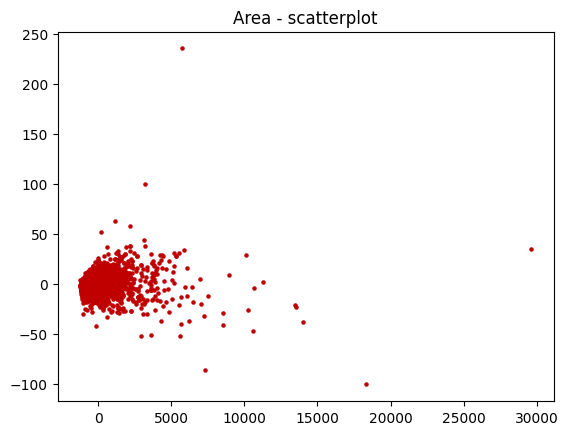

In [35]:
plt.figure()
plt.scatter(numpy_area_trans[:, 0], numpy_area_trans[:, 1], marker='o', color='#C00000', s=5)
plt.title('Area - scatterplot')
plt.show()

In [148]:
pca_area_1 = PCA(n_components=1)
pca_area_1.fit(numpy_area)
print(pca_area_1.explained_variance_ratio_)
numpy_area_trans_1 = pca_area.transform(numpy_area)
print(numpy_area_trans_1.shape)

[0.99993556]
(3171, 2)


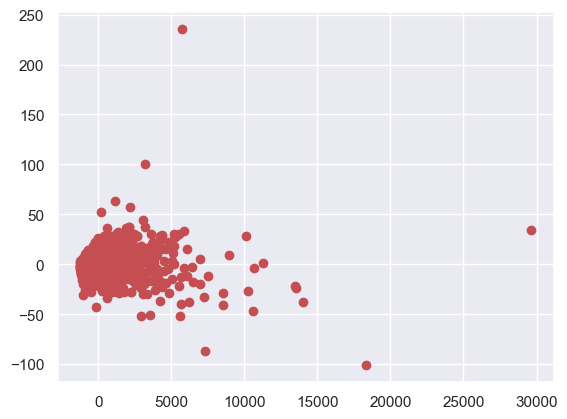

In [149]:
plt.plot(numpy_area_trans_1[:,0], numpy_area_trans_1[:,1], 'ro')

[0.5490301  0.28292969]


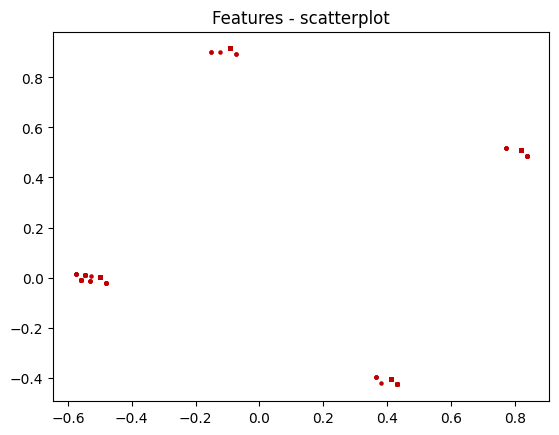

In [37]:
# viz features

numpy_features = features[features.columns.tolist()].values

pca_features = PCA(n_components=2)
pca_features.fit(numpy_features)
print(pca_features.explained_variance_ratio_)
numpy_features_trans = pca_features.transform(numpy_features)

plt.figure()
plt.scatter(numpy_features_trans[:, 0], numpy_features_trans[:, 1], marker='o', color='#C00000', s=5)
plt.title('Features - scatterplot')
plt.show()

[9.99952691e-01 3.62281297e-05]


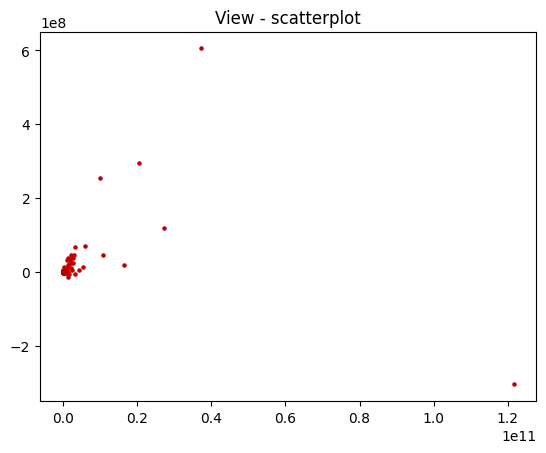

In [38]:
# viz view

numpy_view = view_new[view_new.columns.tolist()].values

pca_view = PCA(n_components=2)
pca_view.fit(numpy_view)
print(pca_view.explained_variance_ratio_)
numpy_view_trans = pca_view.transform(numpy_view)

plt.figure()
plt.scatter(numpy_view_trans[:, 0], numpy_view_trans[:, 1], marker='o', color='#C00000', s=5)
plt.title('View - scatterplot')
plt.show()

[0.98692257 0.01205744]


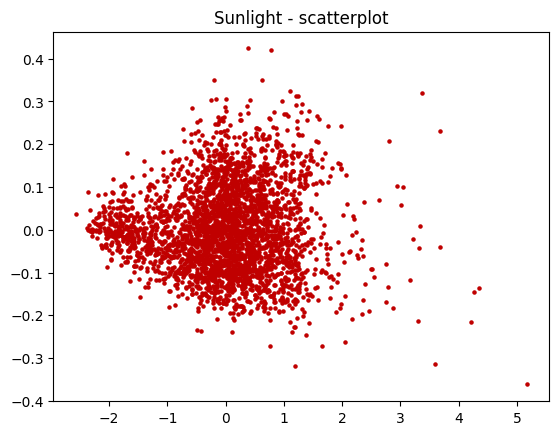

In [39]:
# viz sunlight

numpy_sunlight = sunlight[sunlight.columns.tolist()].values

pca_sunlight = PCA(n_components=2)
pca_sunlight.fit(numpy_sunlight)
print(pca_sunlight.explained_variance_ratio_)
numpy_sunlight_trans = pca_sunlight.transform(numpy_sunlight)

plt.figure()
plt.scatter(numpy_sunlight_trans[:, 0], numpy_sunlight_trans[:, 1], marker='o', color='#C00000', s=5)
plt.title('Sunlight - scatterplot')
plt.show()

[0.64849826 0.34163383]


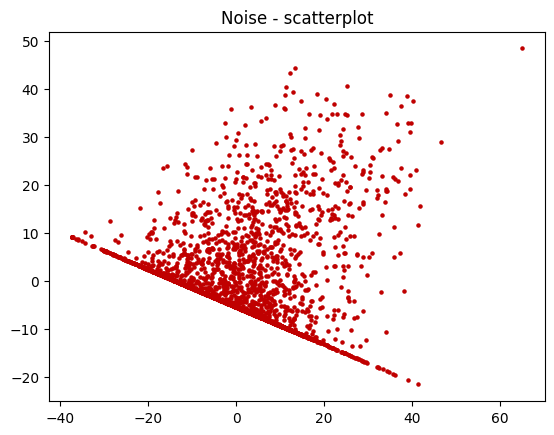

In [40]:
# viz noise

numpy_noise = noise[noise.columns.tolist()].values

pca_noise = PCA(n_components=2)
pca_noise.fit(numpy_noise)
print(pca_noise.explained_variance_ratio_)
numpy_noise_trans = pca_noise.transform(numpy_noise)

plt.figure()
plt.scatter(numpy_noise_trans[:, 0], numpy_noise_trans[:, 1], marker='o', color='#C00000', s=5)
plt.title('Noise - scatterplot')
plt.show()

[0.59588488 0.27730706]


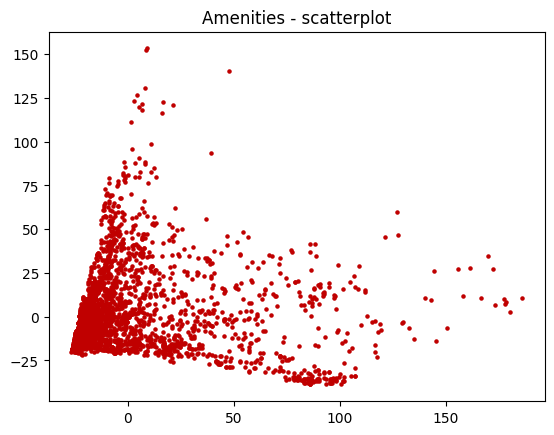

In [41]:
# viz amenities

numpy_amenities = amenities[amenities.columns.tolist()].values

pca_amenities = PCA(n_components=2)
pca_amenities.fit(numpy_amenities)
print(pca_amenities.explained_variance_ratio_)
numpy_amenities_trans = pca_amenities.transform(numpy_amenities)

plt.figure()
plt.scatter(numpy_amenities_trans[:, 0], numpy_amenities_trans[:, 1], marker='o', color='#C00000', s=5)
plt.title('Amenities - scatterplot')
plt.show()

[0.83268901 0.10252549 0.05798157]


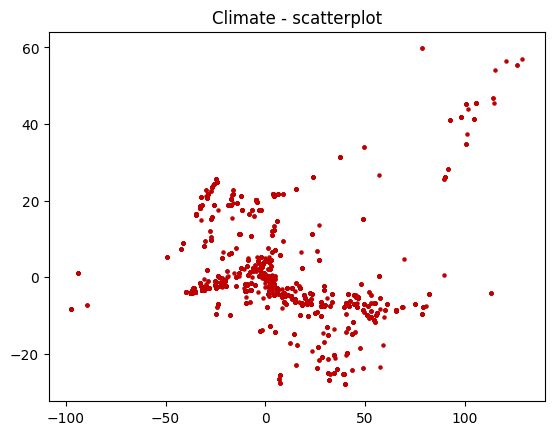

In [42]:
# viz climate

numpy_climate = climate[climate.columns.tolist()].values

pca_climate = PCA(n_components=3)
pca_climate.fit(numpy_climate)
print(pca_climate.explained_variance_ratio_)
numpy_climate_trans = pca_climate.transform(numpy_climate)

plt.figure()
plt.scatter(numpy_climate_trans[:, 0], numpy_climate_trans[:, 1], marker='o', color='#C00000', s=5)
plt.title('Climate - scatterplot')
plt.show()

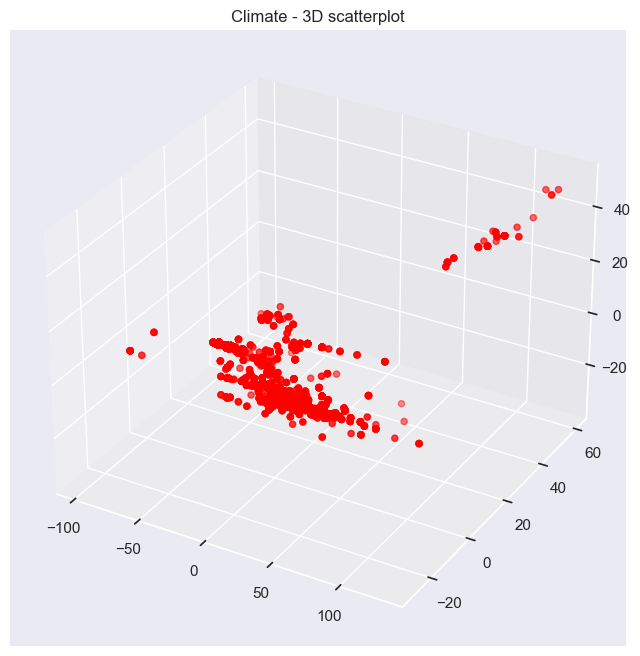

In [159]:
# viz climate 3D

x=numpy_climate_trans[:, 0]
y=numpy_climate_trans[:, 1]
z=numpy_climate_trans[:, 2]

fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(x, y, z, color = "red")
plt.title("Climate - 3D scatterplot")
 
plt.show()

# EXPLORATORY DATA ANALYSIS

# Analysis of distribution of apartments.
    1. The number of apartments and buildings under analysis.
    2. Visualize the number of apartments per building. Are there any outliers?
    3. The number of apartments that are Residential and Commercial.
    4. Are the outliers (if any) of type residential or commercial?

In [44]:
chars = ['building_id','apartment_id']
apartments = pd.DataFrame(geometries[chars])
apartments = apartments.groupby('building_id')['apartment_id'].nunique()
apartments = pd.DataFrame(apartments)

In [45]:
number_of_apartments = sum(apartments['apartment_id'])
print(f"total number of apartments: {number_of_apartments}")

number_of_buildings = len(apartments['apartment_id'])
print(f"total number of buildings: {number_of_buildings}")

print()

ratio_a_to_b = number_of_apartments/number_of_buildings
print(f"ratio of apartments per building on average is {ratio_a_to_b:.2f}")

total number of apartments: 45252
total number of buildings: 3184

ratio of apartments per building on average is 14.21


<span style="color:green;font-size:larger;"><b>In our analysis, there are a total of 45,252 apartments and 3,183 buildings under consideration.</b></span>

In [162]:
apartments.shape

(3183, 1)

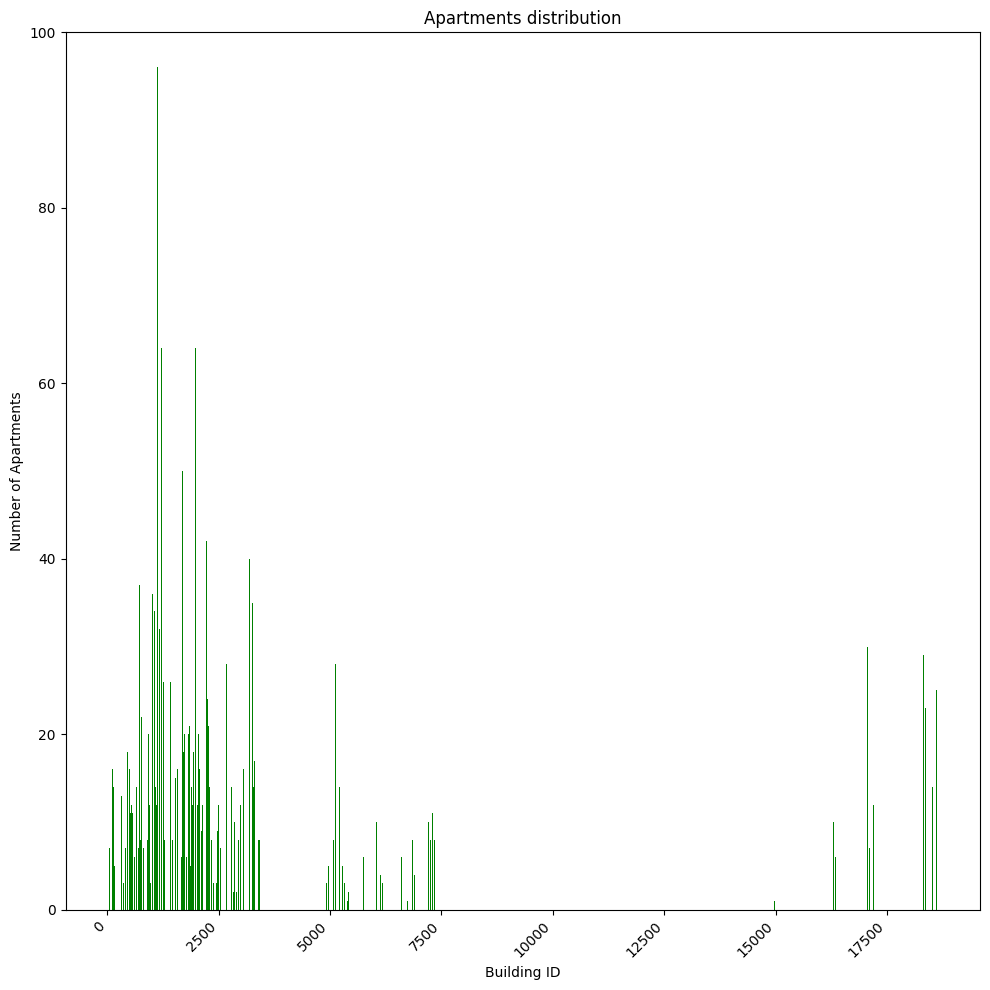

In [53]:
x = apartments.index  
y = apartments['apartment_id']  
     
plt.figure(figsize=(10,10))
plt.bar(x, y, width=0.7, color='green')

plt.title("Apartments distribution")
plt.xlabel("Building ID")
plt.ylabel("Number of Apartments")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

<span style="font-size:larger;"><b>Here, we see a lot of gaps in the graph. to avoid this we divide the building id's into segments and plot their apartment counts separately.</b></span>

In [52]:
apartments1 = apartments[apartments.index < 3800]
apartments2 = apartments[(apartments.index < 7600) & (apartments.index > 3800)]
apartments3 = apartments[apartments.index > 8000]

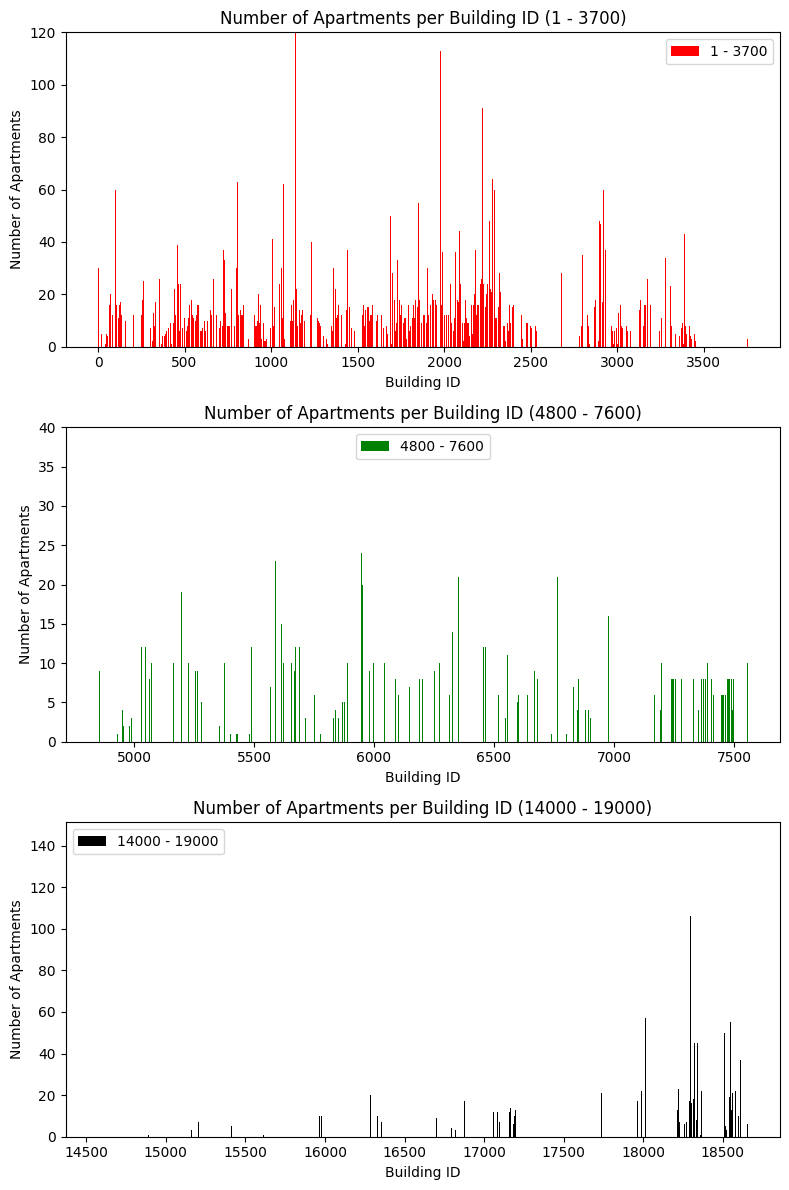

In [55]:
building_ids1 = apartments1.index.tolist()
apartment_counts1 = apartments1['apartment_id'].tolist()

building_ids2 = apartments2.index.tolist()
apartment_counts2 = apartments2['apartment_id'].tolist()

building_ids3 = apartments3.index.tolist()
apartment_counts3 = apartments3['apartment_id'].tolist()

fig, axs = plt.subplots(3, 1, figsize=(8, 12))  # 3 rows, 1 column

axs[0].bar(building_ids1, apartment_counts1, color='red', label="1 - 3700")
axs[1].bar(building_ids2, apartment_counts2, color='green', label="4800 - 7600")
axs[2].bar(building_ids3, apartment_counts3, color='black', label="14000 - 19000")

for ax in axs:
    ax.set_xlabel("Building ID")
    ax.set_ylabel("Number of Apartments")
    ax.legend()

axs[0].set_title("Number of Apartments per Building ID (1 - 3700)")
axs[0].set_ylim(0, 200)
axs[1].set_title("Number of Apartments per Building ID (4800 - 7600)")
axs[1].set_ylim(0, 40)
axs[2].set_title("Number of Apartments per Building ID (14000 - 19000)")
axs[0].set_ylim(0, 120)

plt.tight_layout()
plt.show()

In [217]:
print(f"The number of residential apartments are : {len(set(residential['building_id']))}")

The number of residential apartments are : 3173


In [220]:
print(f"The number of commercial apartments are : {len(set(commercial['building_id']))}")

The number of commercial apartments are : 67


In [238]:
max_apart = apartments[apartments['apartment_id'] > 100].copy()
max_apart.columns = ['apartment_count']
id_list = list(max_apart.index)

In [239]:
for i in id_list:
    print(f"Building number {i} is of type : {set(residential[residential['building_id'] == 1105]['unit_usage'])}")

Building number 807 is of type : {'RESIDENTIAL'}
Building number 1105 is of type : {'RESIDENTIAL'}
Building number 1120 is of type : {'RESIDENTIAL'}
Building number 1141 is of type : {'RESIDENTIAL'}
Building number 1142 is of type : {'RESIDENTIAL'}
Building number 1178 is of type : {'RESIDENTIAL'}
Building number 1214 is of type : {'RESIDENTIAL'}
Building number 1628 is of type : {'RESIDENTIAL'}
Building number 1636 is of type : {'RESIDENTIAL'}
Building number 1979 is of type : {'RESIDENTIAL'}
Building number 2019 is of type : {'RESIDENTIAL'}
Building number 2281 is of type : {'RESIDENTIAL'}
Building number 2455 is of type : {'RESIDENTIAL'}
Building number 18294 is of type : {'RESIDENTIAL'}
Building number 18297 is of type : {'RESIDENTIAL'}
Building number 18298 is of type : {'RESIDENTIAL'}
Building number 18538 is of type : {'RESIDENTIAL'}
Building number 18565 is of type : {'RESIDENTIAL'}


<span style="color:green;font-size:larger;"><b>We understand that all the buildings considered as outliers are Residential.</b></span>

# Does Noise experienced by a building play a role in determining its Leisure Quality?

In [58]:
leisure_quality = pd.DataFrame(ratings[['building_id','location_rating_FZ_W']])

In [59]:
q2_noise = noise[['noise_traffic_day', 'noise_traffic_night']].copy()
q2_noise['traffic_noise'] = noise[['noise_traffic_day', 'noise_traffic_night']].mean(axis=1)
q2_noise.drop(columns=['noise_traffic_day', 'noise_traffic_night'],inplace=True)

In [60]:
merged_data = pd.merge(q2_noise, leisure_quality, on='building_id', how='inner')

correlation = merged_data['traffic_noise'].corr(merged_data['location_rating_FZ_W'])
print(f"Correlation between traffic noise and leisure quality: {correlation} implying no relation between them")

Correlation between traffic noise and leisure quality: 0.0733719202607497 implying no relation between them


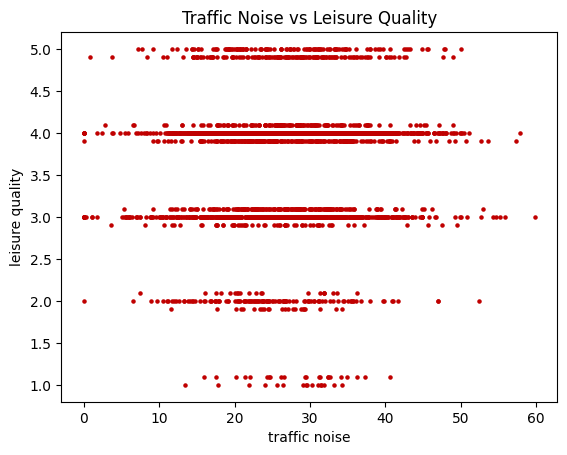

In [61]:
plt.figure()
plt.scatter(merged_data.iloc[:,1],merged_data.iloc[:,2], marker='o', color='#C00000', s=5)
plt.title('Traffic Noise vs Leisure Quality')
plt.xlabel('traffic noise')
plt.ylabel('leisure quality')
plt.show()

<span style="color:green;font-size:larger;"><b>From the graph, we observe that Noise plays no role in determining Leisure Quality in Switzerland.</b></span>

# Analyze the number of buildings (if any) having noise above the expected threshold in Switzerland [55db].

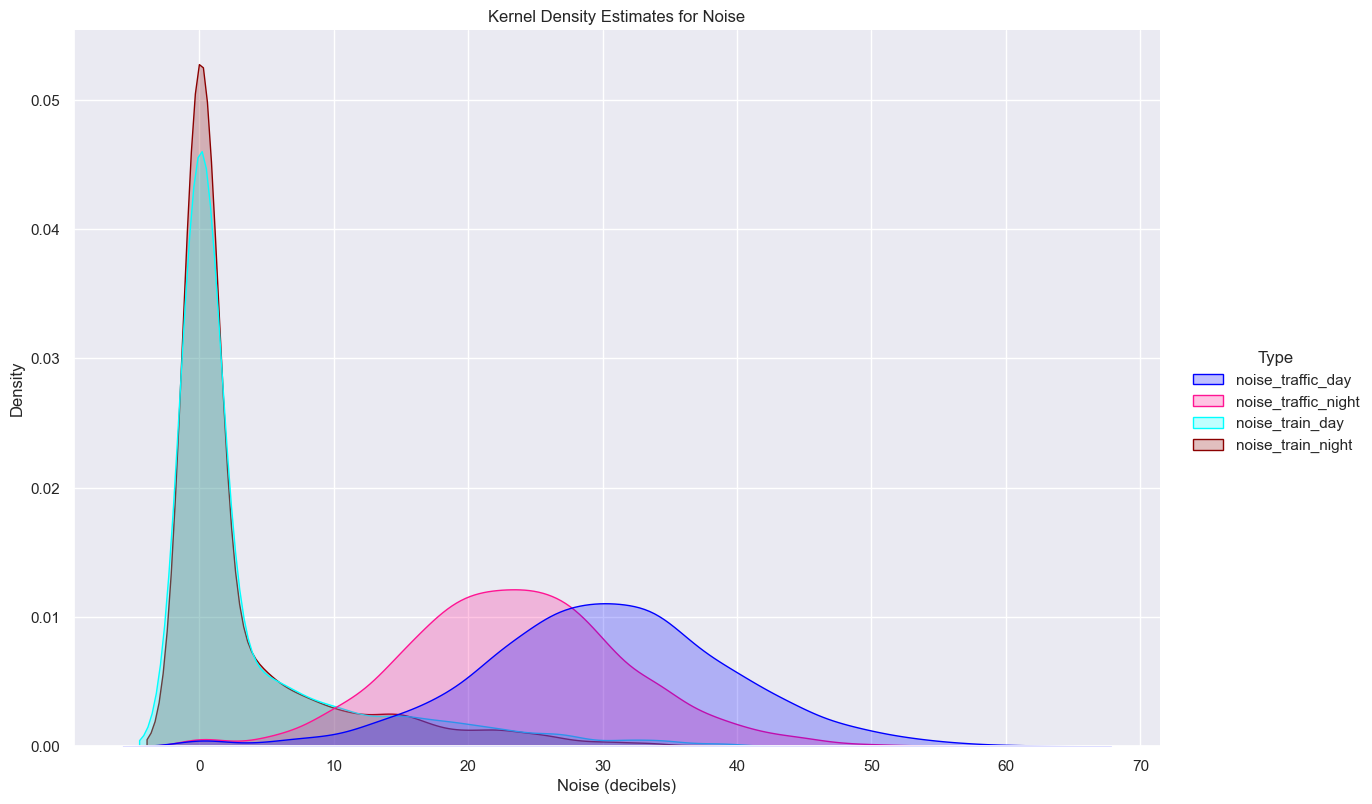

In [66]:
melted_noise = noise.melt(value_vars=['noise_traffic_day', 'noise_traffic_night', 'noise_train_day', 'noise_train_night'], var_name="Type", value_name="Noise")

kde_noise = sns.displot(data=melted_noise, x="Noise", hue="Type", kind="kde", fill=True, height=8, aspect=1.5,
                       palette={"noise_traffic_day": "#0000ff", "noise_traffic_night": "#ff1493", "noise_train_day": "#00ffff", "noise_train_night": "#8b0000"})

plt.xlabel("Noise (decibels)")
plt.ylabel("Density")
plt.title("Kernel Density Estimates for Noise")

plt.savefig('kde_noise.png')

plt.show()

In [240]:
kde_data = kde_noise.data

# Extract the KDE values for noise above 55 decibels
noise_above_55 = kde_data[(kde_data["Noise"] > 55)]

# Sum the densities above 55 decibels for all types of noise
density_above_55 = len(noise_above_55["Type"].tolist())

print("Estimated number of buildings having noise levels above 55 dB:", density_above_55)

Estimated number of buildings having noise levels above 55 dB: 17


<span style="color:green;font-size:larger;"><b>Therefore, 17 buildings have surrounding noise above 55 db.</b></span>

# What type of railway system is prevalent in Switzerland : Elevated railways or Subways?

<span style="font-size:larger;"><i>If correlation between railway noise and elevation of a building is highly positive, it means the railway type is elevated railway (train noise increases as the height of the building increases).
If correlation between railway noise and elevation of a building is highly negative, it means the railway type is subway (train noise decreases as the height of the building increases).
If correlation between railway noise and elevation of a building is almost zero, it means the railway type is both elevated railway as well as subway.</i></span>

In [63]:
height = geometries[['building_id','elevation']].groupby('building_id').aggregate('mean')
height['building_id'] = height.index
height.reset_index(drop=True,inplace=True)

In [64]:
q4_noise = noise[['noise_train_day', 'noise_train_night']].copy()
q4_noise['building_id'] = noise.index
q4_noise['train_noise'] = noise[['noise_train_day', 'noise_train_night']].mean(axis=1)
q4_noise.drop(columns=['noise_train_day', 'noise_train_night'],inplace=True)
q4_noise.reset_index(drop=True,inplace=True)

In [65]:
merged_data_3 = pd.merge(q4_noise, height, on='building_id', how='inner')

correlation = merged_data_3['train_noise'].corr(merged_data_3['elevation'])
print(f"Correlation between train noise and elevation: {correlation} implying no relation between them")

Correlation between train noise and elevation: -0.009499593266657915 implying no relation between them


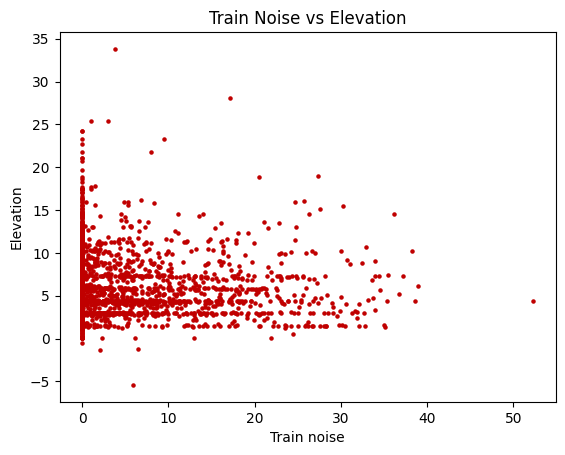

In [66]:
plt.figure()
plt.scatter(merged_data_3.iloc[:,1],merged_data_3.iloc[:,2], marker='o', color='#C00000', s=5)
plt.title('Train Noise vs Elevation')
plt.xlabel('Train noise')
plt.ylabel('Elevation')
plt.show()

<span style="color:green;font-size:larger;"><b>There is no relation between the elevation of houses and railway noise. Therfore, railway system is both elevated and underground. This checks out with the fact that lots of trains in Switzerland move underground and climb steep hills.</b></span>

# Within a 10-minute walk from a building, which amenities are most and least common to find?

In [84]:
total_amenities = pd.DataFrame(np.sum(amenities,axis=0),columns=['count'])
max_count = max(total_amenities['count'])
print(f"Parking is the most prevalent amenity within a 10-minute walk of the buildings with toal sightings of {max_count}")

Parking is the most prevalent amenity within a 10-minute walk of the buildings with toal sightings of 73687.0


In [85]:
total_amenities.head(15)

,count
walkshed_shop_supermarket,11115.0
walkshed_shop_laundry,926.0
walkshed_shop_hairdresser,19355.0
walkshed_amenity_childcare,2632.0
walkshed_amenity_community_centre,1414.0
walkshed_amenity_drinking_water,24529.0
walkshed_amenity_kindergarten,5886.0
walkshed_amenity_parking,73687.0
walkshed_amenity_place_of_worship,7781.0
walkshed_amenity_post_box,16749.0


In [86]:
top_3 = total_amenities.nlargest(3, 'count')
print(top_3)

                                   count
walkshed_amenity_parking         73687.0
walkshed_amenity_restaurant      55939.0
walkshed_amenity_drinking_water  24529.0


<span style="color:green;font-size:larger;"><b>Parking spots, Restaurants and Drinking water facilities are the most common amenities to find.</b></span>

In [87]:
bottom_3 = total_amenities.nsmallest(3, 'count')
print(bottom_3)

                            count
walkshed_shop_gas            12.0
walkshed_healthcare_clinic  838.0
walkshed_shop_laundry       926.0


<span style="color:green;font-size:larger;"><b>Gas stations, Healthcare clinics and Laundary stations are the leaast common amenities to find.</b></span>

In [88]:
amenity_mean = total_amenities.mean()
amenity_mean

count    11717.75
dtype: float64

In [89]:
closest_column = total_amenities.iloc[(total_amenities['count'] - amenity_mean).abs().argsort()[0]]

C:\Users\karat\AppData\Local\Temp\ipykernel_8668\2799625492.py:1: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  closest_column = total_amenities.iloc[(total_amenities['count'] - amenity_mean).abs().argsort()[0]]
C:\Users\karat\AppData\Local\Temp\ipykernel_8668\2799625492.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  closest_column = total_amenities.iloc[(total_amenities['count'] - amenity_mean).abs().argsort()[0]]


In [90]:
closest_column

count    1578.0
Name: walkshed_healthcare_hospitals, dtype: float64

In [91]:
# Calculate statistics for parking
parking = pd.Series(amenities['walkshed_amenity_parking'])
qmin_parking, q1_parking, q2_parking, q3_parking, qmax_parking = parking.quantile([0, 0.25, 0.5, 0.75, 1])
iqr_parking = q3_parking - q1_parking
upper_parking = q3_parking + 1.5 * iqr_parking
lower_parking = q1_parking - 1.5 * iqr_parking
mean_parking = parking.mean()

# Calculate statistics for restaurant
restaurant = pd.Series(amenities['walkshed_amenity_restaurant'])
qmin_restaurant, q1_restaurant, q2_restaurant, q3_restaurant, qmax_restaurant = restaurant.quantile([0, 0.25, 0.5, 0.75, 1])
iqr_restaurant = q3_restaurant - q1_restaurant
upper_restaurant = q3_restaurant + 1.5 * iqr_restaurant
lower_restaurant = q1_restaurant - 1.5 * iqr_restaurant
mean_restaurant = restaurant.mean()

# Calculate statistics for water
water = pd.Series(amenities['walkshed_amenity_drinking_water'])
qmin_water, q1_water, q2_water, q3_water, qmax_water = water.quantile([0, 0.25, 0.5, 0.75, 1])
iqr_water = q3_water - q1_water
upper_water = q3_water + 1.5 * iqr_water
lower_water = q1_water - 1.5 * iqr_water
mean_water = water.mean()

# Calculate statistics for gas
gas = pd.Series(amenities['walkshed_shop_gas'])
qmin_gas, q1_gas, q2_gas, q3_gas, qmax_gas = gas.quantile([0, 0.25, 0.5, 0.75, 1])
iqr_gas = q3_gas - q1_gas
upper_gas = q3_gas + 1.5 * iqr_gas
lower_gas = q1_gas - 1.5 * iqr_gas
mean_gas = gas.mean()

# Calculate statistics for healthcare hospitals
hospital = pd.Series(amenities['walkshed_healthcare_hospitals'])
qmin_hospital, q1_hospital, q2_hospital, q3_hospital, qmax_hospital = hospital.quantile([0, 0.25, 0.5, 0.75, 1])
iqr_hospital = q3_hospital - q1_hospital
upper_hospital = q3_hospital + 1.5 * iqr_hospital
lower_hospital = q1_hospital - 1.5 * iqr_hospital
mean_hospital = hospital.mean()

In [95]:
k = ['parking','restaurant','water','gas']
p = figure(
    x_range= k, 
    title="Comparing the distribution of Amenities : Parking, Restaurant, Drinking water and Gas",
    width=800,
    height=800,
    background_fill_color="azure"
)

hbar_height_parking = (qmax_parking - qmin_parking) / 500

p.segment(['parking'], upper_parking, ['parking'], q3_parking, line_color="black")
p.segment(['parking'], lower_parking, ['parking'], q1_parking, line_color="black")

p.vbar(['parking'], 0.7, q2_parking, q3_parking, line_color="black", fill_color="orange")
p.vbar(['parking'], 0.7, q1_parking, q2_parking, line_color="black", fill_color="orange")

p.rect(['parking'], lower_parking, 0.2, hbar_height_parking, line_color="black")
p.rect(['parking'], upper_parking, 0.2, hbar_height_parking, line_color="black")


hbar_height_restaurant = (qmax_restaurant - qmin_restaurant) / 500

p.segment(['restaurant'], upper_restaurant, ['restaurant'], q3_restaurant, line_color="black")
p.segment(['restaurant'], lower_restaurant, ['restaurant'], q1_restaurant, line_color="black")

p.vbar(['restaurant'], 0.7, q2_restaurant, q3_restaurant, line_color="black", fill_color="green")
p.vbar(['restaurant'], 0.7, q1_restaurant, q2_restaurant, line_color="black", fill_color="green")

p.rect(['restaurant'], lower_restaurant, 0.2, hbar_height_restaurant, line_color="black")
p.rect(['restaurant'], upper_restaurant, 0.2, hbar_height_restaurant, line_color="black")


hbar_height_water = (qmax_water - qmin_water) / 500

p.segment(['water'], upper_water, ['water'], q3_water, line_color="black")
p.segment(['water'], lower_water, ['water'], q1_water, line_color="black")

p.vbar(['water'], 0.7, q2_water, q3_water, line_color="black", fill_color="red")
p.vbar(['water'], 0.7, q1_water, q2_water, line_color="black", fill_color="red")

p.rect(['water'], lower_water, 0.2, hbar_height_water, line_color="black")
p.rect(['water'], upper_water, 0.2, hbar_height_water, line_color="black")


hbar_height_gas = (qmax_gas - qmin_gas) / 500

p.segment(['gas'], upper_gas, ['gas'], q3_gas, line_color="black")
p.segment(['gas'], lower_gas, ['gas'], q1_gas, line_color="black")

p.vbar(['gas'], 0.7, q2_gas, q3_gas, line_color="black", fill_color="yellow")
p.vbar(['gas'], 0.7, q1_gas, q2_gas, line_color="black", fill_color="yellow")

p.rect(['gas'], lower_gas, 0.2, hbar_height_gas, line_color="black")
p.rect(['gas'], upper_gas, 0.2, hbar_height_gas, line_color="black")

show(p)

# Analyze the climate statistics for the buildings.
    1. Visualize any relations between temperature and rainfall and analyze the distribution of rainfall.
    2. Rank the buildings based on Energy consumptions during extreme temperatures.
    3. Visualize the sunlight intensity during equinox, summer and winter solstice.

<span style="color:green;font-size:larger;"><b>Visualize Temperature vs Rainfall using pairplots.</b></span>

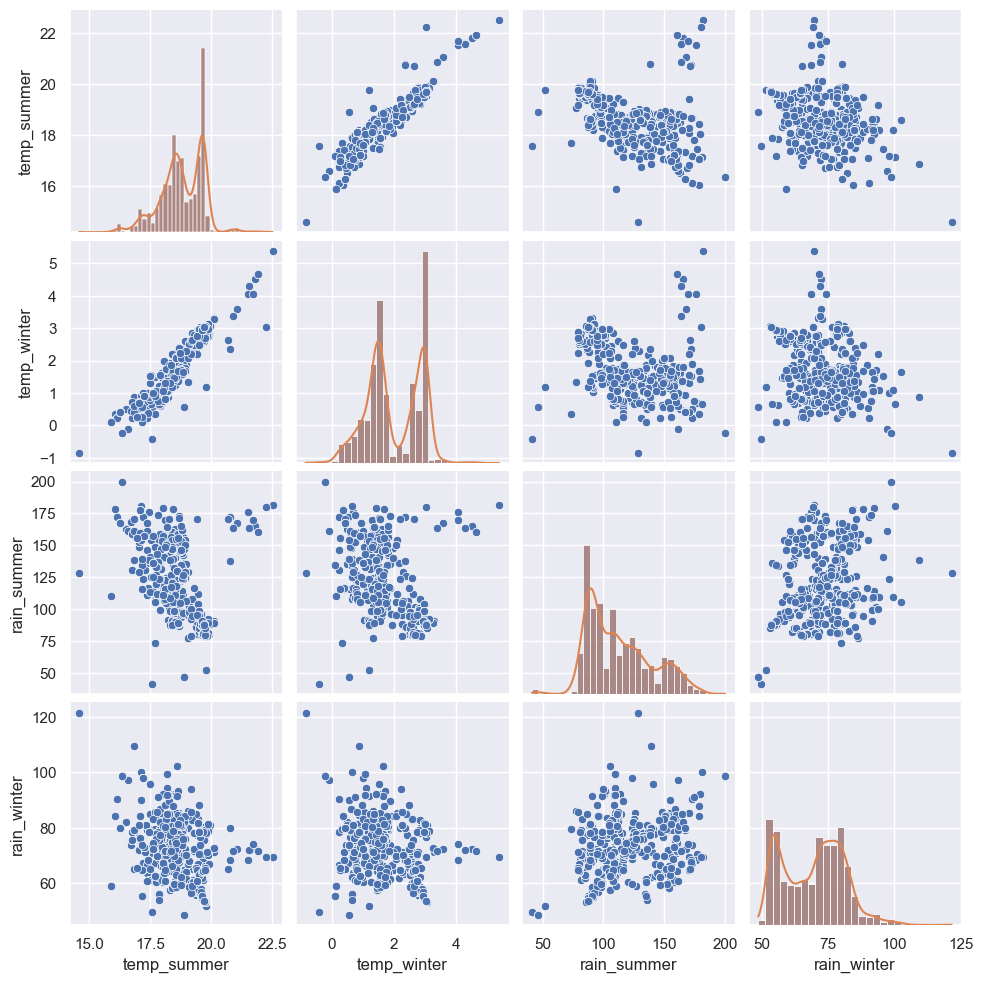

In [61]:
chars = ['temp_summer','temp_winter','rain_summer','rain_winter']

x = sns.pairplot(climate[chars])
x.map_diag(sns.histplot, kde=True)

plt.savefig('temp_pairplot.png')

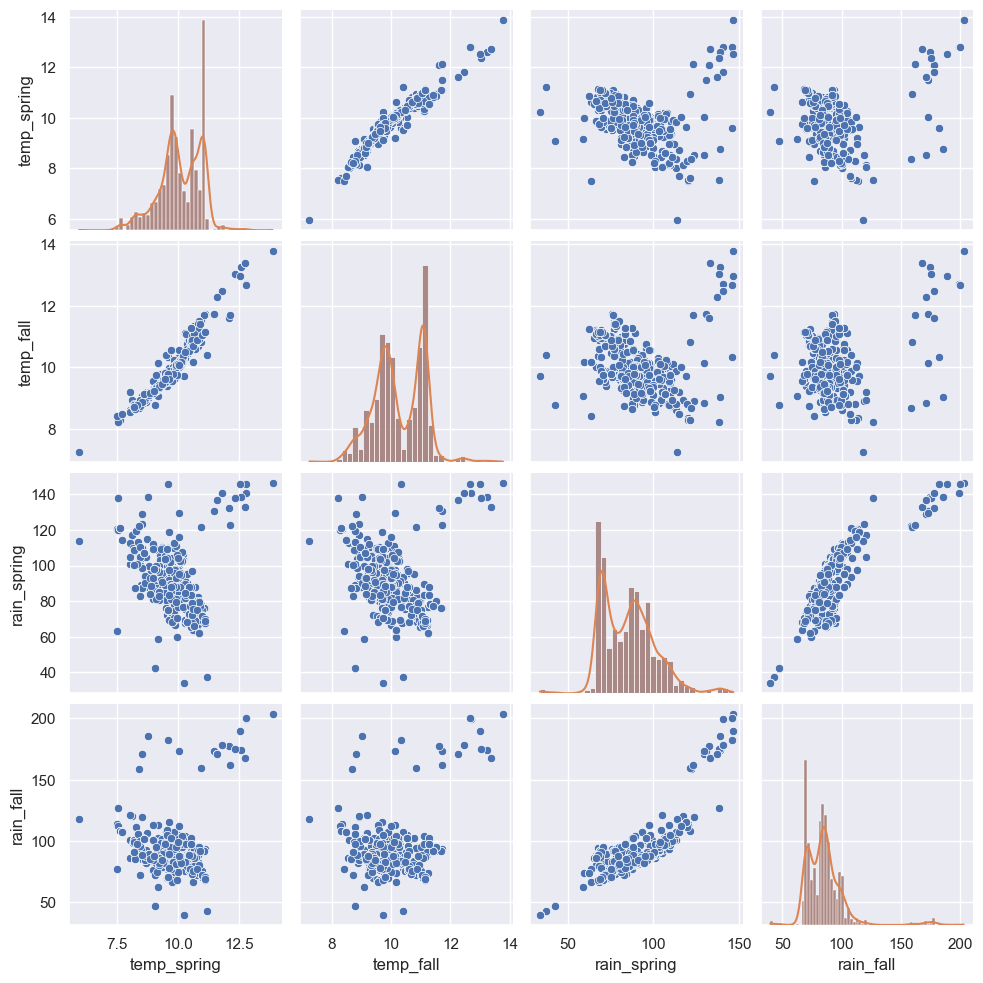

In [62]:
chars = ['temp_spring','temp_fall','rain_spring','rain_fall']

x = sns.pairplot(climate[chars])
x.map_diag(sns.histplot, kde=True)

plt.savefig('rainfall_pairplot.png')

<span style="color:green;font-size:larger;"><b>Rank buildings based on Energy consumption using HDD and CDD.</b></span>

In [67]:
climate.columns

Index(['temp_summer', 'temp_fall', 'temp_winter', 'temp_spring',
       'sunshine_summer', 'sunshine_fall', 'sunshine_winter',
       'sunshine_spring', 'rain_summer', 'rain_fall', 'rain_winter',
       'rain_spring'],
      dtype='object')

In [68]:
avg_temp_summer = climate['temp_summer'].mean(axis=0)
avg_temp_winter = climate['temp_winter'].mean(axis=0)
avg_temp_spring = climate['temp_spring'].mean(axis=0)
avg_temp_fall = climate['temp_fall'].mean(axis=0)

In [69]:
avg_rain_summer = climate['rain_summer'].mean(axis=0)
avg_rain_winter = climate['rain_winter'].mean(axis=0)
avg_rain_spring = climate['rain_spring'].mean(axis=0)
avg_rain_fall = climate['rain_fall'].mean(axis=0)

In [70]:
avg_sun_summer = climate['sunshine_summer'].mean(axis=0)
avg_sun_winter = climate['sunshine_winter'].mean(axis=0)
avg_sun_spring = climate['sunshine_spring'].mean(axis=0)
avg_sun_fall = climate['sunshine_fall'].mean(axis=0)

In [71]:
df_avg = pd.DataFrame({'Summer':[avg_temp_summer,avg_rain_summer,avg_sun_summer],'Spring':[avg_temp_spring,avg_rain_spring,avg_sun_spring]
                  ,'Fall':[avg_temp_fall,avg_rain_fall,avg_sun_fall],'Winter':[avg_temp_winter,avg_rain_winter,avg_sun_winter]},index=['Temperature','Rainfall','Sunlight'])
df_avg

,Summer,Spring,Fall,Winter
Temperature,18.800065,10.079887,10.253277,1.972676
Rainfall,112.854079,85.582509,85.458949,69.416467
Sunlight,0.525541,0.443366,0.370303,0.281786


In [72]:
# Calculate Heating Degree Days (HDD)
def calculate_hdd(temp_winter):
    base_temp = 2  # Adjust base temperature as needed
    hdd = max(0, base_temp - temp_winter)
    return hdd

# Calculate Cooling Degree Days (CDD)
def calculate_cdd(temp_summer):
    base_temp = 18  # Adjust base temperature as needed
    cdd = max(0, temp_summer - base_temp)
    return cdd

climate['HDD'] = climate['temp_winter'].apply(calculate_hdd)
climate['CDD'] = climate['temp_summer'].apply(calculate_cdd)

In [73]:
sorted_hdd = climate.sort_values(by='HDD', ascending=False)
top_hdd = sorted_hdd.head(15)
ids_hdd = top_hdd.index
ids_hdd = ids_hdd.tolist()

In [74]:
sorted_cdd = climate.sort_values(by='CDD', ascending=False)
top_cdd = sorted_cdd.head(15)
ids_cdd = top_cdd.index
ids_cdd = ids_cdd.tolist()

In [75]:
print("buildings with highest energy consumption due to cooling systems in high summer temps:\n",*ids_cdd)

buildings with highest energy consumption due to cooling systems in high summer temps:
 669 721 722 2835 2898 2338 2908 1429 470 1182 257 2900 1181 2325 132


<span style="color:green;font-size:larger;"><b>Buildings with highest Energy consumption due to cooling systems:</b></span>
-    ID - 669
-    ID - 721
-    ID - 722
-    ID - 2835
-    ID - 2898
-    ID - 2338
-    ID - 2908
-    ID - 1429
-    ID - 470
-    ID - 1182

In [76]:
print("buildings with highest energy consumption from heating systems due to low winter temps:\n",*ids_hdd)

buildings with highest energy consumption from heating systems due to low winter temps:
 2287 2286 578 579 575 577 576 1126 1127 1125 17733 2057 2058 1272 3373


<span style="color:green;font-size:larger;"><b>Buildings with highest Energy consumption due to heating systems:</b></span>
-    ID - 2287
-    ID - 2286
-    ID - 578
-    ID - 579
-    ID - 575
-    ID - 577
-    ID - 576
-    ID - 1126
-    ID - 1127
-    ID - 1125

<span style="color:green;font-size:larger;"><b>Visualize the sunlight intensity using kernel density estimation.</b></span>

In [77]:
correlation = climate['temp_summer'].corr(climate['sunshine_summer'])
print(f"Correlation between temperature and sunshine quality in summer: {correlation} implying positive correlation between them")

Correlation between temperature and sunshine quality in summer: 0.5955672386136556 implying positive correlation between them


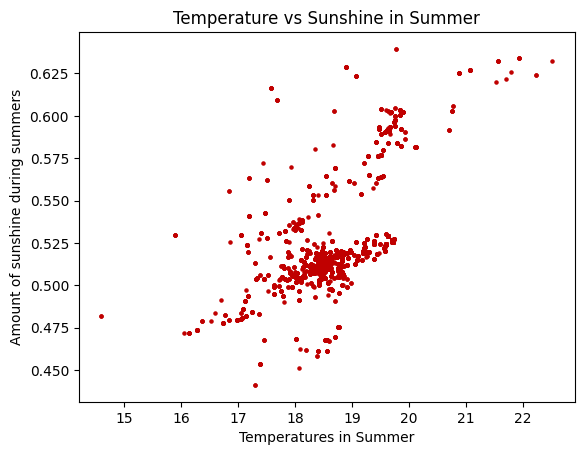

In [78]:
plt.figure()
plt.scatter(climate['temp_summer'],climate['sunshine_summer'], marker='o', color='#C00000', s=5)
plt.title('Temperature vs Sunshine in Summer')
plt.xlabel('Temperatures in Summer')
plt.ylabel('Amount of sunshine during summers')
plt.show()

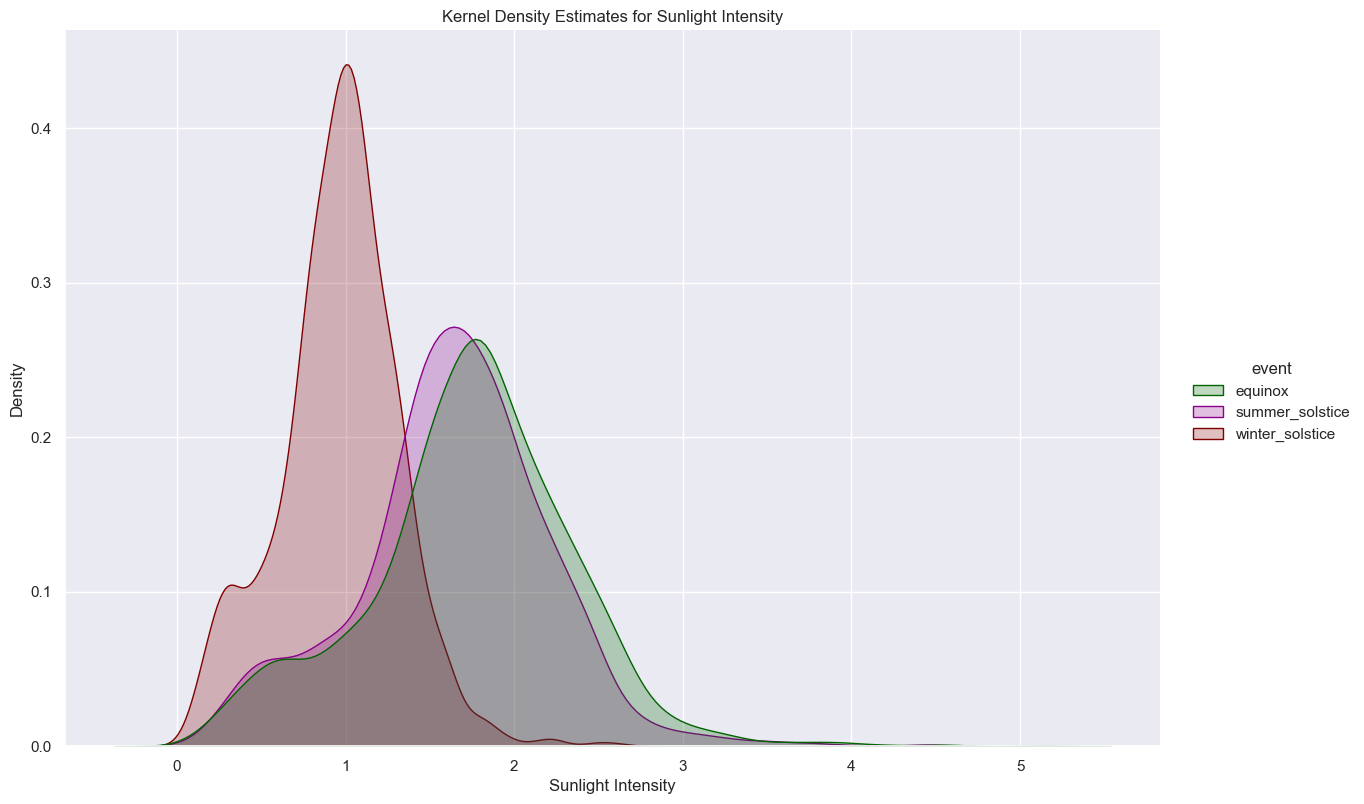

In [65]:
melted_sunlight = sunlight.melt(value_vars=["equinox", "summer_solstice", "winter_solstice"], var_name="event", value_name="sunlight_intensity")

sns.displot(data=melted_sunlight, x="sunlight_intensity", hue="event", kind="kde", fill=True, height=8, aspect=1.5,
           palette={"equinox": "#006400", "summer_solstice": "#8b008b", "winter_solstice": "#800000"})

plt.xlabel("Sunlight Intensity")
plt.ylabel("Density")
plt.title("Kernel Density Estimates for Sunlight Intensity")

plt.savefig('kde_sunlight_intensity.png')

plt.show()

<span style="color:green;font-size:larger;"><b>From the graph; we observe that during winter solstice, intensity is mostly along 1 klx. During equinox and summer solstice, intensity is mostly between 1.5 - 2 klx.</b></span>

# Analyze the ratings of the buildings based on different categories.
    1. Which rating is the most common for Image, Service quality and Leisure Quality?
    2. In which segment of the economic society is the demand for apartments the highest?

In [ ]:
layout = pd.DataFrame(simulations[['building_id','apartment_id','unit_usage','layout_room_count','layout_has_sink','layout_has_shower',
                      'layout_has_toilet','layout_number_of_windows','layout_number_of_doors']]).copy()
layout.replace({True:1,False:0},inplace=True)

In [ ]:
set(simulations['unit_usage'])

In [ ]:
layout_residential = layout[layout['unit_usage'] == 'RESIDENTIAL']
layout_residential.drop(columns=['unit_usage'],inplace=True)
layout_residential = layout_residential.groupby('building_id').aggregate({'apartment_id':'nunique','layout_room_count':'sum','layout_has_sink':'sum','layout_has_shower':'sum',
                                                  'layout_has_toilet':'sum','layout_number_of_windows':'sum','layout_number_of_doors':'sum'})
layout_residential.head(20)

In [ ]:
dict(round(layout_residential.mean(axis=0)))

In [ ]:
layout_apartment = pd.DataFrame(simulations[['apartment_id','unit_usage','layout_room_count','layout_has_sink','layout_has_shower',
                      'layout_has_toilet','layout_number_of_windows','layout_number_of_doors']]).copy()
layout_apartment.replace({True:1,False:0},inplace=True)
layout_apartment = layout_apartment.groupby('apartment_id').aggregate({'layout_room_count':'sum','layout_has_sink':'sum','layout_has_shower':'sum',
                                                  'layout_has_toilet':'sum','layout_number_of_windows':'sum','layout_number_of_doors':'sum'})
layout_apartment.head(20)

In [ ]:
dict(round(layout_apartment.mean(axis=0)))

<Figure size 640x480 with 0 Axes>

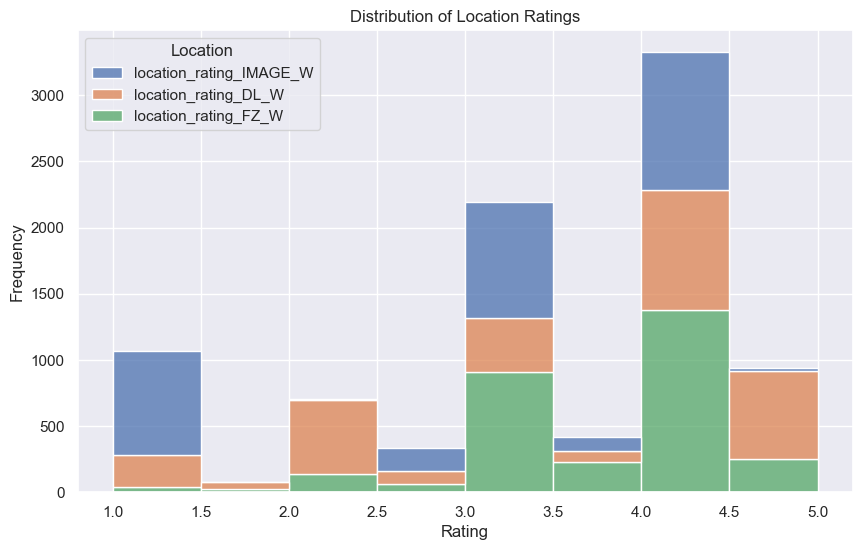

In [63]:
sns.despine(left=True)

combined_data = pd.concat([ratings["location_rating_IMAGE_W"], 
                           ratings["location_rating_DL_W"], 
                           ratings["location_rating_FZ_W"]], axis=1)

melted_data = combined_data.melt(var_name="Location", value_name="Rating")


plt.figure(figsize=(10, 6))
sns.histplot(data=melted_data, x="Rating", hue="Location", multiple="stack", binwidth=0.5)
plt.title('Distribution of Location Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.savefig('ratings_histplot.png')

plt.show()

<span style="color:green;font-size:larger;"><b>For Image, Service and Leisure quality; the most popular rating is between 4.0 and 4.5. The next most popular rating is between 3.0 and 3.5. The distribution shows that most of the buildings have a rating equal to or above 3.0.</b></span>

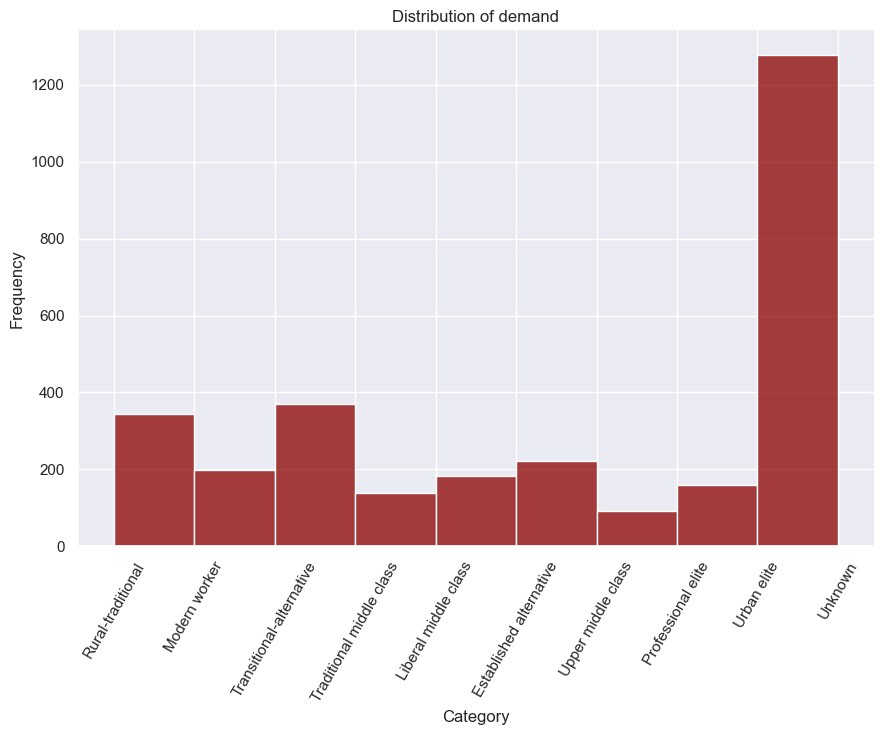

In [64]:
g = sns.FacetGrid(ratings, height=6, aspect=1.5)

bin_edges = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
bin_labels = ['Rural-traditional','Modern worker','Transitional-alternative','Traditional middle class','Liberal middle class',
              'Established alternative','Upper middle class','Professional elite','Urban elite','Unknown'] 

g.map(sns.histplot, "location_rating_NASE_W_DOM", bins=bin_edges, color="#8b0000")

plt.xticks(bin_edges, bin_labels, rotation=60)

plt.title('Distribution of demand')
plt.xlabel('Category')
plt.ylabel('Frequency')

plt.savefig('segment_of_demand_histplot.png')

plt.show()

<span style="color:green;font-size:larger;"><b>From the distribution, we conclude that there is an overwhelming demand for apartments by the urban elite.</b></span>

# Analyze the Temperature and Rainfall variations across the year. Is there any relation between the two quantities?

In [48]:
import seaborn as sns
sns.set_theme()

In [49]:
chars = ['climate_tnorm_january', 'climate_tnorm_february', 'climate_tnorm_march', 'climate_tnorm_april',
 'climate_tnorm_may', 'climate_tnorm_june', 'climate_tnorm_july', 'climate_tnorm_august', 'climate_tnorm_september', 'climate_tnorm_october',
 'climate_tnorm_november', 'climate_tnorm_december']

temp_heatmap = locations[chars].copy()
temp_heatmap.head(5)

,climate_tnorm_january,climate_tnorm_february,climate_tnorm_march,climate_tnorm_april,climate_tnorm_may,climate_tnorm_june,climate_tnorm_july,climate_tnorm_august,climate_tnorm_september,climate_tnorm_october,climate_tnorm_november,climate_tnorm_december
0,0.983336,1.598433,5.686452,9.597866,13.791452,17.487988,19.213671,18.738903,14.448492,9.902225,4.789725,1.686696
1,2.462277,3.496078,7.328565,11.046396,14.942973,18.550728,20.538803,20.032452,15.724369,11.398013,6.273206,3.165987
2,0.767750,1.767057,5.880623,9.980331,14.086136,17.687014,19.386477,18.884411,14.578543,9.875676,4.765352,1.561769
3,2.336012,3.355901,7.178701,10.892455,14.793460,18.398733,20.388515,19.884254,15.582870,11.262583,6.144640,3.037007
4,1.149247,1.873038,5.965421,9.907611,14.065423,17.685936,19.451265,18.991117,14.702394,10.175740,5.022228,1.876228


In [50]:
temp_heatmap['sum_temp'] = temp_heatmap.sum(axis=1)
temp_heatmap.head()

,climate_tnorm_january,climate_tnorm_february,climate_tnorm_march,climate_tnorm_april,climate_tnorm_may,climate_tnorm_june,climate_tnorm_july,climate_tnorm_august,climate_tnorm_september,climate_tnorm_october,climate_tnorm_november,climate_tnorm_december,sum_temp
0,0.983336,1.598433,5.686452,9.597866,13.791452,17.487988,19.213671,18.738903,14.448492,9.902225,4.789725,1.686696,117.925241
1,2.462277,3.496078,7.328565,11.046396,14.942973,18.550728,20.538803,20.032452,15.724369,11.398013,6.273206,3.165987,134.959847
2,0.767750,1.767057,5.880623,9.980331,14.086136,17.687014,19.386477,18.884411,14.578543,9.875676,4.765352,1.561769,119.221139
3,2.336012,3.355901,7.178701,10.892455,14.793460,18.398733,20.388515,19.884254,15.582870,11.262583,6.144640,3.037007,133.255133
4,1.149247,1.873038,5.965421,9.907611,14.065423,17.685936,19.451265,18.991117,14.702394,10.175740,5.022228,1.876228,120.865650


In [51]:
temp_heatmap_1 = temp_heatmap.sort_values(by='sum_temp',ascending=False).head(10)
temp_heatmap_2 = temp_heatmap.sort_values(by='sum_temp',ascending=True).head(10)

In [52]:
temp_heatmap_final = pd.concat([temp_heatmap_1,temp_heatmap_2],axis=0,ignore_index=False)
temp_heatmap_final.drop(columns=['sum_temp'],inplace=True)

In [53]:
temp_heatmap_final

,climate_tnorm_january,climate_tnorm_february,climate_tnorm_march,climate_tnorm_april,climate_tnorm_may,climate_tnorm_june,climate_tnorm_july,climate_tnorm_august,climate_tnorm_september,climate_tnorm_october,climate_tnorm_november,climate_tnorm_december
1081,4.760815,6.180428,10.399518,13.740533,17.521202,21.327499,23.376314,22.836317,18.679773,13.826588,8.803773,5.245206
1281,3.991061,5.215396,9.139556,12.548020,16.544302,20.645651,22.833155,22.324368,18.135647,13.402666,8.598424,4.787811
2356,3.991061,5.215396,9.139556,12.548020,16.544302,20.645651,22.833155,22.324368,18.135647,13.402666,8.598424,4.787811
2559,3.991061,5.215396,9.139556,12.548020,16.544302,20.645651,22.833155,22.324368,18.135647,13.402666,8.598424,4.787811
168,3.991061,5.215396,9.139556,12.548020,16.544302,20.645651,22.833155,22.324368,18.135647,13.402666,8.598424,4.787811
1589,3.859238,5.075535,8.995516,12.403509,16.405434,20.503372,22.695297,22.188734,17.991295,13.276441,8.467623,4.654058
2940,3.380307,4.723785,8.847198,12.346575,16.409061,20.440886,22.583092,22.059385,17.837326,13.041665,8.068264,4.082644
1420,3.648034,4.844639,8.748699,12.153188,16.162420,20.257128,22.458544,21.959585,17.751427,13.065685,8.253067,4.442464
569,3.648034,4.844639,8.748699,12.153188,16.162420,20.257128,22.458544,21.959585,17.751427,13.065685,8.253067,4.442464
104,3.648034,4.844639,8.748699,12.153188,16.162420,20.257128,22.458544,21.959585,17.751427,13.065685,8.253067,4.442464


<span style="font-size:larger;"><i>The first 10 rows of the heatmap show the temperature variation of building id's with the highest average temperature. The following two rows show the coldest building id's. The remaining rows show the average temperature variations.</i></span>

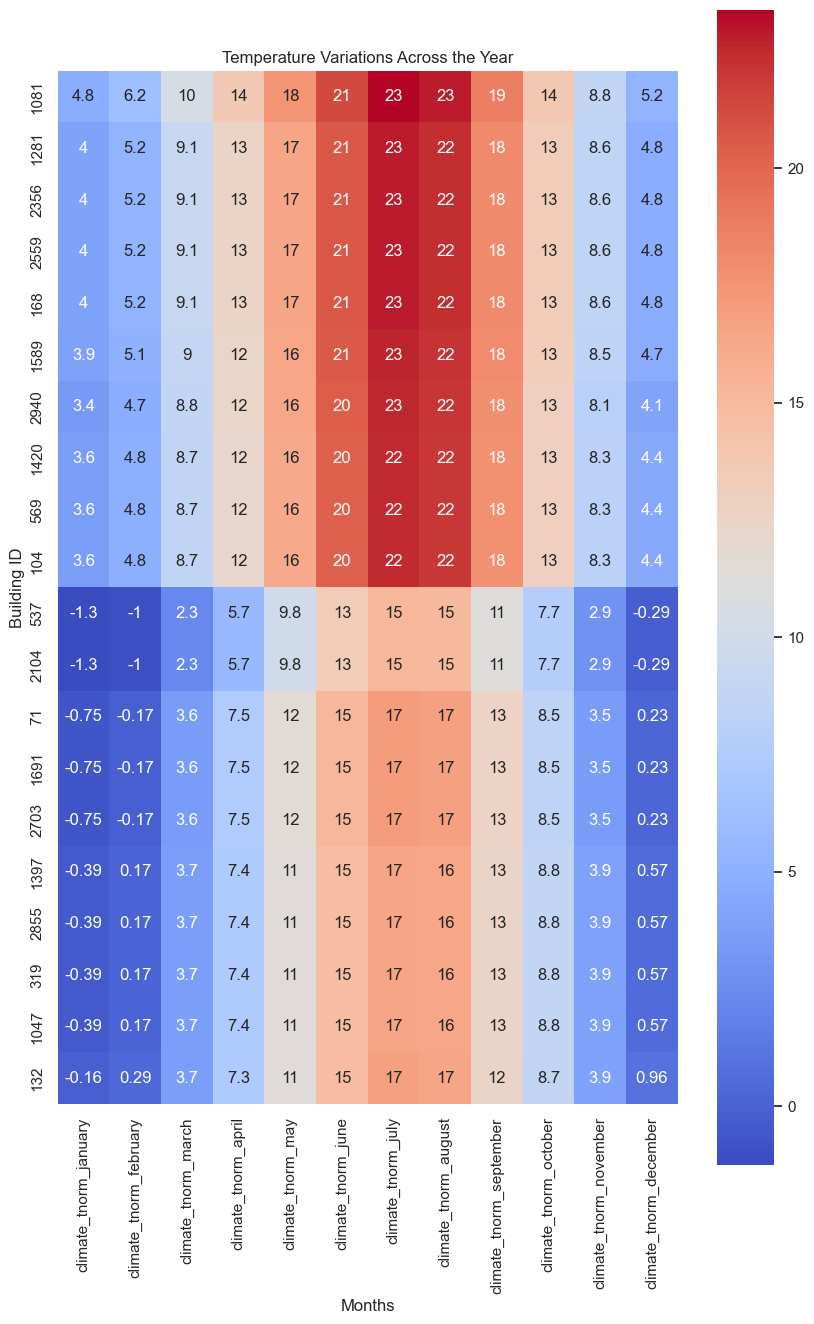

In [54]:
plt.figure(figsize=(10, 15))  
sns.heatmap(temp_heatmap_final, annot=True, cmap='coolwarm', square=True)
plt.title('Temperature Variations Across the Year')
plt.xlabel('Months')
plt.ylabel('Building ID')

plt.savefig('temperature_heatmap.png')

plt.show()

<span style="color:green;font-size:larger;"><b>From the heatmap, we can visualize the extreme temperature variations and compare it to the average temperature variations. Some buildings show a maximum temperature of 23°C while some buildings show a minimum of -1.3°C.</b></span>  

In [55]:
chars = ['climate_rnorm_january','climate_rnorm_february','climate_rnorm_march','climate_rnorm_april','climate_rnorm_may',
 'climate_rnorm_june','climate_rnorm_july','climate_rnorm_august','climate_rnorm_september','climate_rnorm_october','climate_rnorm_november','climate_rnorm_december',]

rain_heatmap = locations[chars].copy()
rain_heatmap.head(5)

,climate_rnorm_january,climate_rnorm_february,climate_rnorm_march,climate_rnorm_april,climate_rnorm_may,climate_rnorm_june,climate_rnorm_july,climate_rnorm_august,climate_rnorm_september,climate_rnorm_october,climate_rnorm_november,climate_rnorm_december
0,66.675598,59.492298,70.081627,78.023422,121.296951,117.058449,121.021751,114.644119,84.010979,83.812546,78.643906,86.587990
1,48.838036,45.805904,48.165520,62.646168,95.935677,86.210533,89.950569,85.125923,69.147270,73.791817,64.855133,65.986244
2,67.443901,56.726528,58.203640,62.642395,90.728127,86.042336,94.257484,86.238182,65.514633,71.478050,67.309700,80.943855
3,50.371952,48.151749,51.460155,66.676178,102.537025,91.958618,95.943611,91.404236,75.498978,78.458817,68.083572,70.030754
4,70.820442,62.125992,71.379082,76.615982,118.597015,113.407936,116.341118,110.677193,83.861107,83.806999,79.548859,89.430046


In [56]:
rain_heatmap['sum_rain'] = rain_heatmap.sum(axis=1)
rain_heatmap.head()

,climate_rnorm_january,climate_rnorm_february,climate_rnorm_march,climate_rnorm_april,climate_rnorm_may,climate_rnorm_june,climate_rnorm_july,climate_rnorm_august,climate_rnorm_september,climate_rnorm_october,climate_rnorm_november,climate_rnorm_december,sum_rain
0,66.675598,59.492298,70.081627,78.023422,121.296951,117.058449,121.021751,114.644119,84.010979,83.812546,78.643906,86.587990,1081.349636
1,48.838036,45.805904,48.165520,62.646168,95.935677,86.210533,89.950569,85.125923,69.147270,73.791817,64.855133,65.986244,836.458794
2,67.443901,56.726528,58.203640,62.642395,90.728127,86.042336,94.257484,86.238182,65.514633,71.478050,67.309700,80.943855,887.528831
3,50.371952,48.151749,51.460155,66.676178,102.537025,91.958618,95.943611,91.404236,75.498978,78.458817,68.083572,70.030754,890.575645
4,70.820442,62.125992,71.379082,76.615982,118.597015,113.407936,116.341118,110.677193,83.861107,83.806999,79.548859,89.430046,1076.611771


In [57]:
rain_heatmap_1 = rain_heatmap.sort_values(by='sum_rain',ascending=False).head(8)
rain_heatmap_2 = rain_heatmap.sort_values(by='sum_rain',ascending=False)[1500:1507]
rain_heatmap_3 = rain_heatmap.sort_values(by='sum_rain',ascending=True).head(3)

In [58]:
rain_heatmap_final = pd.concat([rain_heatmap_1,rain_heatmap_2,rain_heatmap_3],axis=0,ignore_index=False)
rain_heatmap_final.drop(columns=['sum_rain'],inplace=True)

In [59]:
rain_heatmap_final

,climate_rnorm_january,climate_rnorm_february,climate_rnorm_march,climate_rnorm_april,climate_rnorm_may,climate_rnorm_june,climate_rnorm_july,climate_rnorm_august,climate_rnorm_september,climate_rnorm_october,climate_rnorm_november,climate_rnorm_december
1081,66.296783,60.268238,89.275352,159.204132,191.056320,184.520493,155.917465,204.195877,201.735733,206.439575,201.424164,82.361794
2369,65.693008,60.065891,87.990875,158.374969,191.523682,184.374039,153.598618,201.745758,196.317490,203.366959,200.792496,82.627762
1991,65.693008,60.065891,87.990875,158.374969,191.523682,184.374039,153.598618,201.745758,196.317490,203.366959,200.792496,82.627762
984,64.753380,58.720535,82.578598,149.090439,190.475815,178.722031,152.414551,197.366699,198.669724,205.194519,194.985718,82.278122
2940,71.953941,66.235756,85.611969,154.662491,197.985764,179.739471,155.028717,174.327347,184.636658,183.566574,200.174118,84.703857
1029,71.825928,64.801384,83.925224,152.315002,201.384079,188.780380,154.127411,175.506088,183.688385,177.810760,186.283630,84.963852
1492,71.825928,64.801384,83.925224,152.315002,201.384079,188.780380,154.127411,175.506088,183.688385,177.810760,186.283630,84.963852
16,68.099335,59.423489,81.167351,149.735504,185.390182,178.798523,155.445099,195.254532,178.608276,185.149582,192.730759,84.153168
2794,71.478790,62.385395,70.832245,76.479462,117.189690,110.309181,116.132423,108.322739,81.361214,83.572670,80.132812,91.129662
2469,71.478790,62.385395,70.832245,76.479462,117.189690,110.309181,116.132423,108.322739,81.361214,83.572670,80.132812,91.129662


<span style="font-size:larger;"><i>The first 8 rows of the heatmap show the rainfall variation of building id's with the highest average rainfall. The following 7 rows show the average rainfall variations. The remaining rows show the minimum rainfall variations.</i></span>

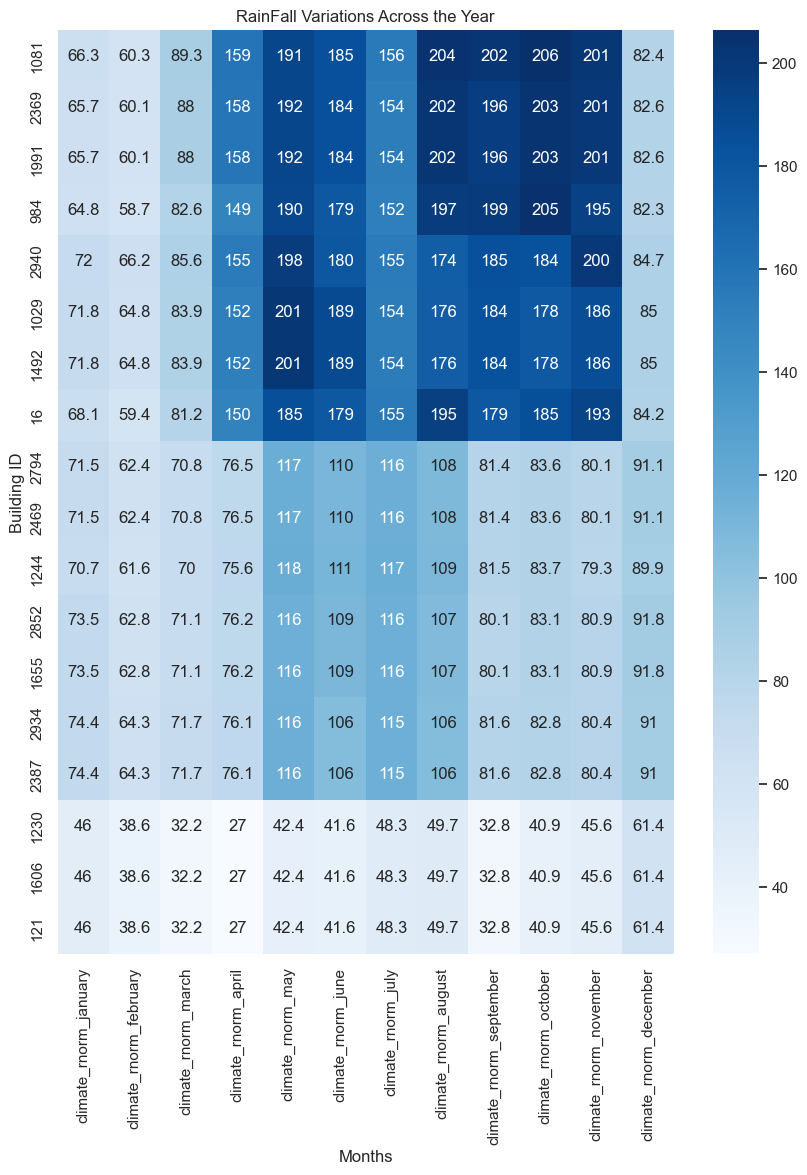

In [60]:
plt.figure(figsize=(10, 12))  
sns.heatmap(rain_heatmap_final, annot=True, cmap='Blues', square=True, fmt='.3g')
plt.title('RainFall Variations Across the Year')
plt.xlabel('Months')
plt.ylabel('Building ID')

plt.savefig('rainfall_heatmap.png')

plt.show()

<span style="color:green;font-size:larger;"><b>From the heatmap, we can visualize the extreme rainfall variations and compare it to the average rainfall variations. Some buildings show a maximum rainfall of 204cm while some buildings show a minimum of 27cm.</b></span>  

<span style="color:crimson;font-size:larger;"><b>Observing both the heatmaps, we conclude that rainfall and temperature are co-dependent in Switzerland. During the months of May, June, July, August and September; where the temperature is the highest, we notice that the rainfall is at its highest as well.</b></span>  

# Does the elevation of a building affect the view experienced from it?

In [79]:
leisure_image = pd.DataFrame(ratings[['building_id','location_rating_IMAGE_W']])

In [80]:
q3_view = view_new.copy()
q3_view['building_id'] = view_new.index
q3_view['view_avg'] = view_new[view_new.columns].mean(axis=1)
q3_view.drop(columns=view_new.columns,inplace=True)
q3_view.reset_index(drop=True,inplace=True)

In [81]:
merged_data_4 = pd.merge(q3_view, height, on='building_id', how='inner')
merged_data_4 = merged_data_4[merged_data_4['view_avg'] < 4.0e+8]

correlation = merged_data_4['view_avg'].corr(merged_data_4['elevation'])
print(f"Correlation between view and elevation: {correlation} implying there is a small correlation between them")

Correlation between view and elevation: 0.2403133677964601 implying there is a small correlation between them


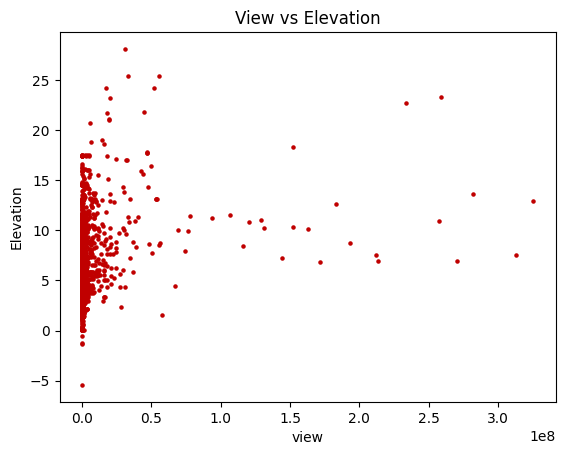

In [82]:
plt.figure()
plt.scatter(merged_data_4.iloc[:,1],merged_data_4.iloc[:,2], marker='o', color='#C00000', s=5)
plt.title('View vs Elevation')
plt.xlabel('view')
plt.ylabel('Elevation')
plt.show()

<span style="color:green;font-size:larger;"><b>Initially there is no relation between elevation and the view around the buildings as seen in the graph; but as the elevation increases, we see that the view experienced is also more than normal, implying that a larger view is often due to more elevated houses.</b></span>

<span style="color:crimson;font-size:larger;"><b>The clustering of data towards the beginning of the graph may be due to view obstruction from other surrounding buildings or due to inconsistent number of windows across apartments. This issue becomes less prevalent as the elevation of the house increases.</b></span>

# Ratings of a building depend on multiple features; for example its area, climate, view around the building and the noise experienced. Given these feature values, can we predict the rating of the house?

<span style="color:green;font-size:larger;"><b>Generating the required features (Feature engineering).</b></span>

In [68]:
temperature = climate[['temp_summer', 'temp_fall', 'temp_winter', 'temp_spring']].copy()

In [69]:
temperature['temp'] = temperature[temperature.columns].mean(axis=1)
temperature.drop(columns=['temp_summer', 'temp_fall', 'temp_winter', 'temp_spring'], inplace=True)

In [70]:
temperature['building_id'] = temperature.index
temperature.reset_index(inplace=True, drop=True)
temperature.head()

,temp,building_id
0,9.827103,826
1,11.246654,16314
2,9.935095,3261
3,11.104594,747
4,10.072137,1853


In [71]:
rain = climate[['rain_summer', 'rain_fall', 'rain_winter', 'rain_spring']].copy()
rain['rain'] = rain[rain.columns].mean(axis=1)
rain.drop(columns=['rain_summer', 'rain_fall', 'rain_winter', 'rain_spring'], inplace=True)

In [72]:
rain['building_id'] = rain.index
rain.reset_index(inplace=True, drop=True)
rain.head()

,rain,building_id
0,90.112470,826
1,69.704899,16314
2,73.960736,3261
3,74.214637,747
4,89.717648,1853


In [73]:
surr = view_new[['view_buildings', 'view_greenery', 'view_ground', 'view_highways',
                 'view_mountains', 'view_pedestrains', 'view_sky', 'view_streets',
                 'view_site', 'view_railway_tracks', 'view_water']].copy()
surr['view'] = surr[surr.columns].sum(axis=1)
surr.drop(columns=['view_buildings', 'view_greenery', 'view_ground', 'view_highways',
                   'view_mountains', 'view_pedestrains', 'view_sky', 'view_streets',
                   'view_site', 'view_railway_tracks', 'view_water'], inplace=True)

In [74]:
surr['building_id'] = surr.index
surr.reset_index(inplace=True, drop=True)
surr.head()

,view,building_id
0,3.591097e+05,1
1,7.398326e+04,2
2,1.246999e+08,3
3,3.321504e+04,4
4,4.780584e+07,8


In [75]:
carpet_area = area[['layout_area']].copy()
carpet_area['building_id'] = carpet_area.index
carpet_area.reset_index(inplace=True, drop=True)
carpet_area.head()

,layout_area,building_id
0,316.852987,1
1,619.420157,2
2,2489.333437,3
3,434.115654,4
4,952.951043,8


In [76]:
surr_noise = noise[noise.columns].copy()
surr_noise['noise'] = surr_noise[['noise_traffic_day', 'noise_traffic_night']].mean(axis=1) + surr_noise[['noise_train_day', 'noise_train_night']].mean(axis=1)
surr_noise.drop(columns=['noise_traffic_day', 'noise_traffic_night', 'noise_train_day', 'noise_train_night'], inplace=True)

In [77]:
surr_noise['building_id'] = surr_noise.index
surr_noise.reset_index(inplace=True, drop=True)
surr_noise.head()

,noise,building_id
0,19.812927,1
1,39.801774,2
2,68.002135,3
3,13.485273,4
4,10.983452,8


In [78]:
over_rating = ratings[['building_id','location_rating_MIKRAT_W']].copy()
over_rating.head()

,building_id,location_rating_MIKRAT_W
0,826,3.8
1,16314,4.3
2,3261,3.6
3,747,3.6
4,1853,3.4


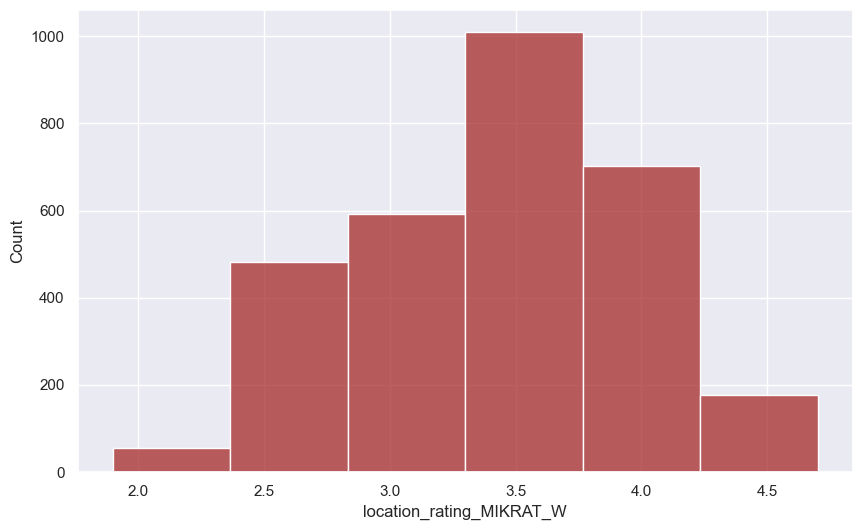

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(data=ratings, x="location_rating_MIKRAT_W", binwidth=0.5, color="brown")
plt.show()


<span style="color:green;font-size:larger;"><b>Creating a dataset.</b></span>

In [80]:
dataset = pd.merge(temperature, rain, on='building_id')
dataset = pd.merge(dataset, surr, on='building_id')
dataset = pd.merge(dataset, surr_noise, on='building_id')
dataset = pd.merge(dataset, carpet_area, on='building_id')
dataset = pd.merge(dataset, over_rating, on='building_id')
dataset.index = dataset['building_id']
dataset.drop(columns=['building_id'], inplace=True)
dataset.head()

,temp,rain,view,noise,layout_area,location_rating_MIKRAT_W
building_id,,,,,,
826,9.827103,90.112470,1.857781e+05,15.670697,444.953487,3.8
16314,11.246654,69.704899,3.340162e+05,27.405235,729.596711,4.3
3261,9.935095,73.960736,2.685673e+08,24.674734,3535.632998,3.6
747,11.104594,74.214637,2.135410e+06,24.385970,625.952314,3.6
1853,10.072137,89.717648,1.232991e+08,36.396517,6062.415136,3.4


In [82]:
dataset.shape

(3008, 6)

In [83]:
dataset.columns

Index(['temp', 'rain', 'view', 'noise', 'layout_area',
       'location_rating_MIKRAT_W'],
      dtype='object')

In [84]:
max_temp = max(dataset['temp'])
min_temp = min(dataset['temp'])
max_rain = max(dataset['rain'])
min_rain = min(dataset['rain'])
max_view = max(dataset['view'])
min_view = min(dataset['view'])
max_noise = max(dataset['noise'])
min_noise = min(dataset['noise'])
max_area = max(dataset['layout_area'])
min_area = min(dataset['layout_area'])

In [85]:
dataset['temp'] = (max_temp - dataset['temp'])/(max_temp - min_temp)
dataset['rain'] = (max_rain - dataset['rain'])/(max_rain - min_rain)
dataset['view'] = (max_view - dataset['view'])/(max_view - min_view)
dataset['noise'] = (max_noise - dataset['noise'])/(max_noise - min_noise)
dataset['layout_area'] = (max_area - dataset['layout_area'])/(max_area - min_area)

In [86]:
dataset.replace({0:0.01},inplace=True)
dataset.head(10)

,temp,rain,view,noise,layout_area,location_rating_MIKRAT_W
building_id,,,,,,
826,0.568026,0.556526,0.999999,0.857054,0.986828,3.8
16314,0.369635,0.745462,0.999997,0.750014,0.977596,4.3
3261,0.552934,0.706061,0.997926,0.774921,0.886591,3.6
747,0.389488,0.703710,0.999984,0.777555,0.980958,3.6
1853,0.533781,0.560181,0.999048,0.667997,0.804643,3.4
927,0.409178,0.677248,0.999529,0.799697,0.943323,3.5
17964,0.411954,0.717613,0.999997,0.750273,0.981967,3.3
389,0.559394,0.515033,1.000000,0.838957,0.986595,4.0
6436,0.369635,0.745462,1.000000,0.820782,0.997075,4.2


In [87]:
dataset = dataset.dropna(how='any',axis=0)

In [88]:
dataset.isnull().any()

temp                        False
rain                        False
view                        False
noise                       False
layout_area                 False
location_rating_MIKRAT_W    False
dtype: bool

<span style="color:green;font-size:larger;"><b>Model building.</b></span>

In [81]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.16.1


In [90]:
X = tf.convert_to_tensor(dataset[['temp', 'rain', 'view', 'noise', 'layout_area']].values, dtype=tf.float32)
Y = tf.convert_to_tensor(dataset[['location_rating_MIKRAT_W']].values, dtype=tf.float32)

In [91]:
num_samples = len(X)

indices = tf.range(num_samples)
indices = tf.random.shuffle(indices)

train_size = int(0.8 * num_samples)
train_indices = indices[:train_size]
test_indices = indices[train_size:]

x_train, x_test = tf.gather(X, train_indices), tf.gather(X, test_indices)
y_train, y_test = tf.gather(Y, train_indices), tf.gather(Y, test_indices)


In [92]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape,sep="\n")

(2403, 5)
(601, 5)
(2403, 1)
(601, 1)


In [114]:
# Set random seed
tf.random.set_seed(42)

# Define the regression model
reg_model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
reg_model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Fit the model
history = reg_model.fit(x_train, y_train, epochs=30, validation_split=0.2, verbose=2)


Epoch 1/30
61/61 - 4s - 63ms/step - loss: 14.4720 - val_loss: 11.9976
Epoch 2/30
61/61 - 0s - 5ms/step - loss: 11.1233 - val_loss: 10.0343
Epoch 3/30
61/61 - 0s - 4ms/step - loss: 9.1581 - val_loss: 7.7206
Epoch 4/30
61/61 - 0s - 5ms/step - loss: 5.9054 - val_loss: 3.4603
Epoch 5/30
61/61 - 0s - 5ms/step - loss: 1.6381 - val_loss: 0.3871
Epoch 6/30
61/61 - 0s - 5ms/step - loss: 0.3087 - val_loss: 0.2719
Epoch 7/30
61/61 - 0s - 5ms/step - loss: 0.2917 - val_loss: 0.2714
Epoch 8/30
61/61 - 0s - 6ms/step - loss: 0.2912 - val_loss: 0.2715
Epoch 9/30
61/61 - 0s - 5ms/step - loss: 0.2908 - val_loss: 0.2717
Epoch 10/30
61/61 - 0s - 5ms/step - loss: 0.2904 - val_loss: 0.2720
Epoch 11/30
61/61 - 0s - 5ms/step - loss: 0.2901 - val_loss: 0.2721
Epoch 12/30
61/61 - 0s - 4ms/step - loss: 0.2896 - val_loss: 0.2723
Epoch 13/30
61/61 - 0s - 5ms/step - loss: 0.2891 - val_loss: 0.2724
Epoch 14/30
61/61 - 0s - 4ms/step - loss: 0.2888 - val_loss: 0.2723
Epoch 15/30
61/61 - 0s - 4ms/step - loss: 0.2888 - v

In [101]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 11])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

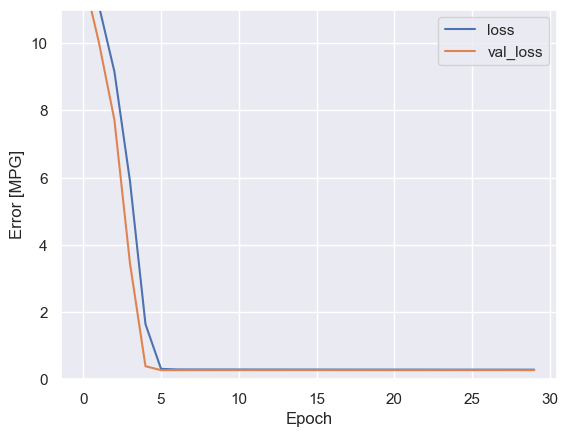

In [141]:
plot_loss(history)

In [115]:
predictions = reg_model.predict(x_test).flatten()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [124]:
predictions.shape

(601,)

In [132]:
actual = np.array(y_test)
actual = actual.reshape(601)
actual.shape

(601,)

In [134]:
error = predictions - actual
error.shape

(601,)

Text(0, 0.5, 'Count')

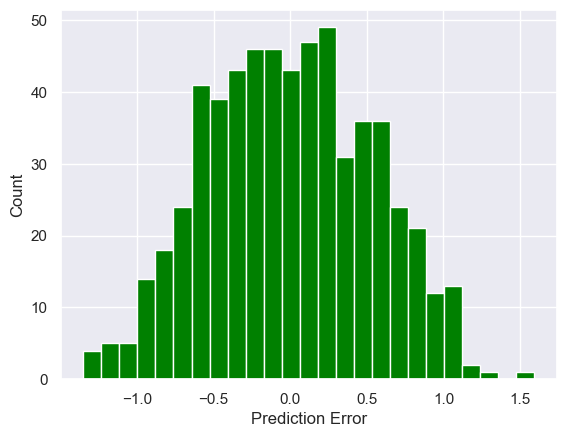

In [140]:
plt.hist(error, bins=25, color='green')
plt.xlabel('Prediction Error')
plt.ylabel('Count')

In [142]:
reg_model.save('rating_predict.keras')

<span style="color:crimson;font-size:larger;"><b>Using this model, we can predict the rating of a building given the necessary features.</b></span>

# viewing plots by downloading as image

In [ ]:
from IPython.display import Image

# Replace 'your_plot.png' with the actual filename of your saved PNG file
Image(filename='your_plot.png')  


# END OF NOTEBOOK